In [5]:
import lightkurve as lk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import apollinaire as apn
from lightkurve import LightCurveCollection

In [8]:
#download light curve files
def download(kic_id):
    '''returns sorted lc collection by quarter'''
    lc_files = lk.search_lightcurve(kic_id, mission='kepler', exptime='short').download_all()
    sorted_lc_collection = LightCurveCollection(sorted(lc_files, key=lambda lc: lc.quarter))
    return sorted_lc_collection

In [9]:
kic_id = 'KIC6106415'
lc_files = download(kic_id)

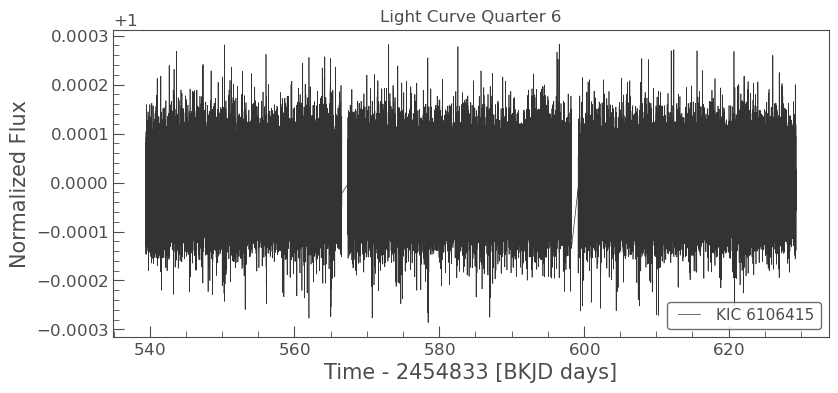

In [45]:
%matplotlib inline

lc = lc_files[1:4].stitch()

def plot_lc(lc, title):
    '''Plotting function for each light curve'''
    lc = lc.flatten().remove_outliers()
    lc.plot()
    plt.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.gcf().subplots_adjust(top=0.87)
    plt.tight_layout()
    plt.title(title)

plot_lc(lc, "Light Curve Quarter 6")

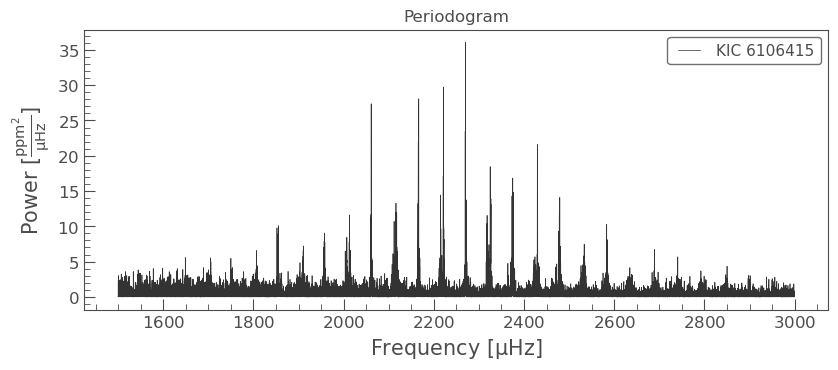

In [27]:
def pg_func(lc, low_bound, high_bound, title):
    '''Calulate and plot periodogram'''
    pg = lc.normalize(unit='ppm').to_periodogram(method='lombscargle', normalization='psd', oversample_factor = 10, minimum_frequency=low_bound, maximum_frequency = high_bound)
    pg.plot()
    plt.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.gcf().subplots_adjust(top=0.85)
    plt.title(title)

pg_func(lc, 1500, 3000,'Periodogram')

In [18]:
# Stellar parameters from Gaia
teff = 6037
numax = 2249
dnu = 104.07
mass = 1.039
radius = 1.213

In [8]:
import os

# Peakbagging process
dir_path = '/home/chrisl2324/KIC6106145/New_Fit/mcmc1'

apn.peakbagging.stellar_framework(
        pg.frequency.value, pg.power.value, r = radius, m=mass, teff=teff, dnu=dnu, numax=numax, mcmcDir=dir_path,
        filename_back=os.path.join(dir_path, 'background.png'), 
        filemcmc_back=os.path.join(dir_path, 'mcmc_background.h5'),
        n_order=3, n_order_peakbagging=8, n_harvey=0, power_law=True,
        filename_pattern=os.path.join(dir_path, 'pattern.png'), low_cut = 800, high_cut_plaw=4000,
        filemcmc_pattern=os.path.join(dir_path, 'mcmc.h5'), 
        parallelise=False,
        progress=True, quickfit=True,
        a2z_file=os.path.join(dir_path, 'modes_param.a2z'), 
        fit_amp=True, 
        fit_splittings=False,
        format_cornerplot='png', 
        filename_peakbagging=os.path.join(dir_path, 'summary_peakbagging.png'), 
        dpi=300)

Beginning fit


100%|███████████████████████████████████████| 1000/1000 [00:35<00:00, 28.46it/s]


Beginning fit


100%|███████████████████████████████████████| 1000/1000 [00:58<00:00, 17.07it/s]


Orders to fit: 16, 17, 18, 19, 20, 21, 22, 23, 24
Fitting on order 16
Window width: 89.1 muHz, with low bound at 1781.5 muHz and up bound at 1870.6 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_16.h5


100%|███████████████████████████████████████| 1000/1000 [13:52<00:00,  1.20it/s]


Ensemble sampling achieved
Fitting on order 17
Window width: 89.6 muHz, with low bound at 1885.4 muHz and up bound at 1975.0 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_17.h5


100%|███████████████████████████████████████| 1000/1000 [01:12<00:00, 13.71it/s]


Ensemble sampling achieved
Fitting on order 18
Window width: 90.1 muHz, with low bound at 1989.3 muHz and up bound at 2079.4 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_18.h5


100%|███████████████████████████████████████| 1000/1000 [01:14<00:00, 13.43it/s]


Ensemble sampling achieved
Fitting on order 19
Window width: 90.6 muHz, with low bound at 2093.4 muHz and up bound at 2183.9 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_19.h5


100%|███████████████████████████████████████| 1000/1000 [01:13<00:00, 13.52it/s]


Ensemble sampling achieved
Fitting on order 20
Window width: 91.1 muHz, with low bound at 2197.5 muHz and up bound at 2288.5 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_20.h5


100%|███████████████████████████████████████| 1000/1000 [01:12<00:00, 13.80it/s]


Ensemble sampling achieved
Fitting on order 21
Window width: 91.6 muHz, with low bound at 2301.6 muHz and up bound at 2393.2 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_21.h5


100%|███████████████████████████████████████| 1000/1000 [01:11<00:00, 13.94it/s]


Ensemble sampling achieved
Fitting on order 22
Window width: 92.1 muHz, with low bound at 2405.9 muHz and up bound at 2497.9 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_22.h5


100%|███████████████████████████████████████| 1000/1000 [01:12<00:00, 13.86it/s]


Ensemble sampling achieved
Fitting on order 23
Window width: 92.5 muHz, with low bound at 2510.2 muHz and up bound at 2602.7 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_23.h5


100%|███████████████████████████████████████| 1000/1000 [01:11<00:00, 14.06it/s]


Ensemble sampling achieved
Fitting on order 24
Window width: 93.0 muHz, with low bound at 2614.6 muHz and up bound at 2707.6 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_24.h5


100%|███████████████████████████████████████| 1000/1000 [00:29<00:00, 34.23it/s]


Ensemble sampling achieved


/home/chrisl2324/anaconda3/envs/apoll/lib/python3.11/site-packages/apollinaire/peakbagging/fit_tools.py:1044: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


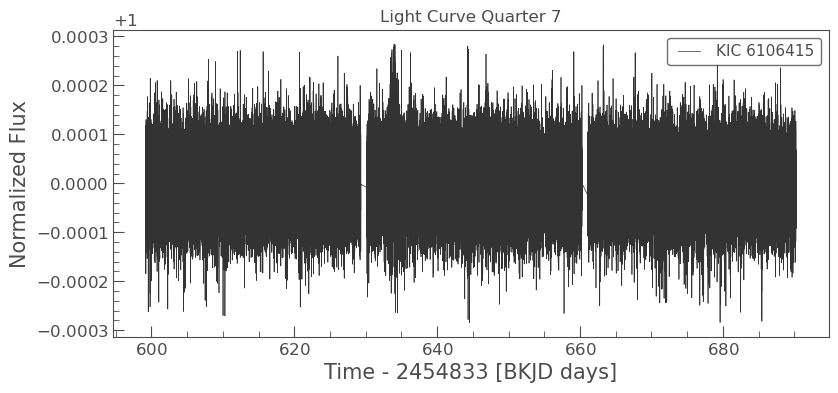

In [41]:
%matplotlib inline

lc = lc_files[3:6].stitch()
plot_lc(lc, "Light Curve Quarter 7")

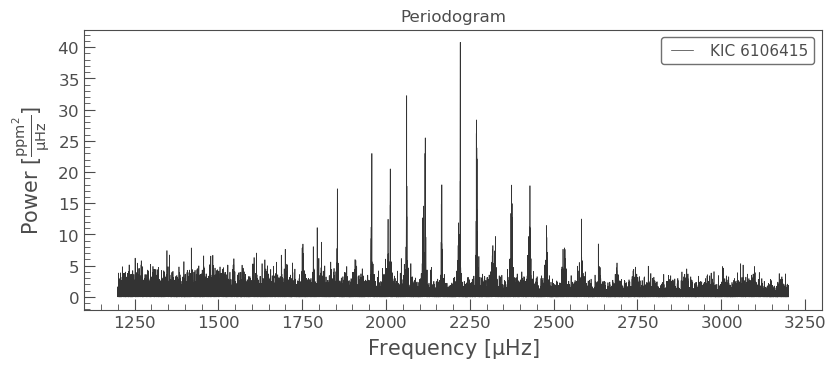

In [32]:
pg_func(lc, 1200, 3200, "Periodogram")

In [10]:
dir_path = '/home/chrisl2324/KIC6106145/New_Fit/mcmc1'

apn.peakbagging.stellar_framework(
        pg.frequency.value, pg.power.value, r = radius, m=mass, teff=teff, dnu=dnu, numax=numax, mcmcDir=dir_path,
        filename_back=os.path.join(dir_path, 'background.png'), 
        filemcmc_back=os.path.join(dir_path, 'mcmc_background.h5'),
        n_order=3, n_order_peakbagging=8, n_harvey=0, power_law=True,
        filename_pattern=os.path.join(dir_path, 'pattern.png'), low_cut = 1600, high_cut_plaw=3000,
        filemcmc_pattern=os.path.join(dir_path, 'mcmc.h5'), 
        parallelise=False,
        progress=True, quickfit=True,
        a2z_file=os.path.join(dir_path, 'modes_param.a2z'), 
        fit_amp=True, 
        fit_splittings=False,
        format_cornerplot='png', 
        filename_peakbagging=os.path.join(dir_path, 'summary_peakbagging.png'), 
        dpi=300)

Beginning fit


100%|███████████████████████████████████████| 1000/1000 [00:43<00:00, 23.12it/s]


Beginning fit


100%|███████████████████████████████████████| 1000/1000 [00:56<00:00, 17.79it/s]


Orders to fit: 16, 17, 18, 19, 20, 21, 22, 23, 24
Fitting on order 16
Window width: 90.6 muHz, with low bound at 1780.1 muHz and up bound at 1870.7 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_16.h5


100%|███████████████████████████████████████| 1000/1000 [01:13<00:00, 13.59it/s]


Ensemble sampling achieved
Fitting on order 17
Window width: 90.9 muHz, with low bound at 1884.3 muHz and up bound at 1975.2 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_17.h5


100%|███████████████████████████████████████| 1000/1000 [01:12<00:00, 13.79it/s]


Ensemble sampling achieved
Fitting on order 18
Window width: 91.2 muHz, with low bound at 1988.4 muHz and up bound at 2079.6 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_18.h5


100%|███████████████████████████████████████| 1000/1000 [01:12<00:00, 13.80it/s]


Ensemble sampling achieved
Fitting on order 19
Window width: 91.5 muHz, with low bound at 2092.7 muHz and up bound at 2184.1 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_19.h5


100%|███████████████████████████████████████| 1000/1000 [01:12<00:00, 13.88it/s]


Ensemble sampling achieved
Fitting on order 20
Window width: 91.8 muHz, with low bound at 2196.9 muHz and up bound at 2288.7 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_20.h5


100%|███████████████████████████████████████| 1000/1000 [01:08<00:00, 14.52it/s]


Ensemble sampling achieved
Fitting on order 21
Window width: 92.0 muHz, with low bound at 2301.2 muHz and up bound at 2393.2 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_21.h5


100%|███████████████████████████████████████| 1000/1000 [01:02<00:00, 16.09it/s]


Ensemble sampling achieved
Fitting on order 22
Window width: 92.3 muHz, with low bound at 2405.5 muHz and up bound at 2497.8 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_22.h5


100%|███████████████████████████████████████| 1000/1000 [01:02<00:00, 16.13it/s]


Ensemble sampling achieved
Fitting on order 23
Window width: 92.6 muHz, with low bound at 2509.8 muHz and up bound at 2602.4 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_23.h5


100%|███████████████████████████████████████| 1000/1000 [01:01<00:00, 16.19it/s]


Ensemble sampling achieved
Fitting on order 24
Window width: 92.9 muHz, with low bound at 2614.1 muHz and up bound at 2707.0 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc1/mcmc_sampler_order_24.h5


100%|███████████████████████████████████████| 1000/1000 [01:04<00:00, 15.45it/s]


Ensemble sampling achieved


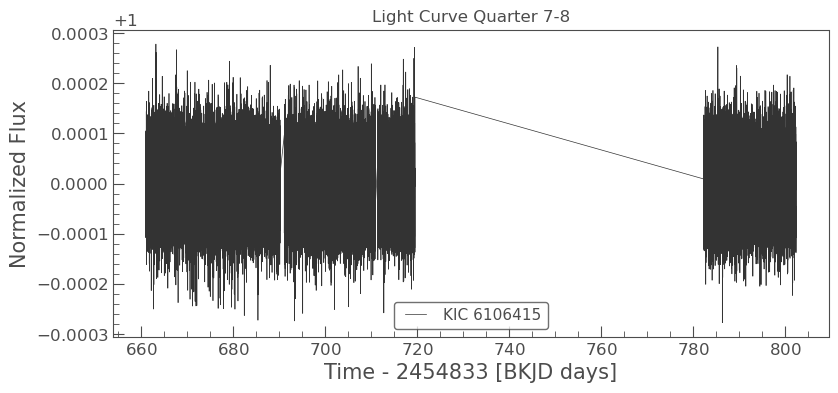

In [46]:
lc = lc_files[5:8].stitch()
plot_lc(lc, "Light Curve Quarter 7-8")

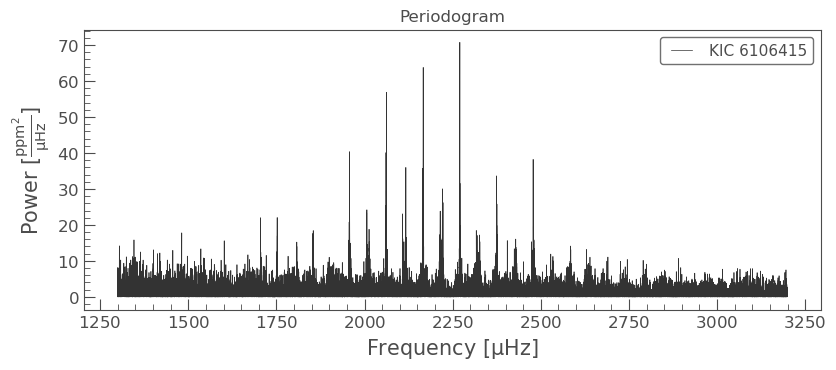

In [35]:
pg_func(lc, 1300, 3200, "Periodogram")

In [13]:
import os

dir_path = '/home/chrisl2324/KIC6106145/New_Fit/mcmc2'

apn.peakbagging.stellar_framework(
        pg.frequency.value, pg.power.value, r = radius, m=mass, teff=teff, dnu=dnu, numax=numax, mcmcDir=dir_path,
        filename_back=os.path.join(dir_path, 'background.png'), 
        filemcmc_back=os.path.join(dir_path, 'mcmc_background.h5'),
        n_order=3, n_order_peakbagging=8, n_harvey=0, power_law=True,
        filename_pattern=os.path.join(dir_path, 'pattern.png'), low_cut = 1600, high_cut_plaw=3000,
        filemcmc_pattern=os.path.join(dir_path, 'mcmc.h5'), 
        parallelise=False,
        progress=True, quickfit=True,
        a2z_file=os.path.join(dir_path, 'modes_param.a2z'), 
        fit_amp=True, 
        fit_splittings=False,
        format_cornerplot='png', 
        filename_peakbagging=os.path.join(dir_path, 'summary_peakbagging.png'), 
        dpi=300)

Beginning fit


100%|███████████████████████████████████████| 1000/1000 [00:46<00:00, 21.63it/s]


Beginning fit


100%|███████████████████████████████████████| 1000/1000 [01:18<00:00, 12.75it/s]


Orders to fit: 16, 17, 18, 19, 20, 21, 22, 23, 24
Fitting on order 16
Window width: 93.6 muHz, with low bound at 1777.7 muHz and up bound at 1871.3 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc2/mcmc_sampler_order_16.h5


100%|███████████████████████████████████████| 1000/1000 [01:23<00:00, 11.94it/s]


Ensemble sampling achieved
Fitting on order 17
Window width: 93.5 muHz, with low bound at 1882.2 muHz and up bound at 1975.7 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc2/mcmc_sampler_order_17.h5


100%|███████████████████████████████████████| 1000/1000 [01:23<00:00, 11.99it/s]


Ensemble sampling achieved
Fitting on order 18
Window width: 93.4 muHz, with low bound at 1986.6 muHz and up bound at 2080.1 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc2/mcmc_sampler_order_18.h5


100%|███████████████████████████████████████| 1000/1000 [01:27<00:00, 11.45it/s]


Ensemble sampling achieved
Fitting on order 19
Window width: 93.4 muHz, with low bound at 2091.1 muHz and up bound at 2184.5 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc2/mcmc_sampler_order_19.h5


100%|███████████████████████████████████████| 1000/1000 [01:23<00:00, 12.04it/s]


Ensemble sampling achieved
Fitting on order 20
Window width: 93.3 muHz, with low bound at 2195.7 muHz and up bound at 2289.0 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc2/mcmc_sampler_order_20.h5


100%|███████████████████████████████████████| 1000/1000 [01:25<00:00, 11.75it/s]


Ensemble sampling achieved
Fitting on order 21
Window width: 93.2 muHz, with low bound at 2300.2 muHz and up bound at 2393.5 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc2/mcmc_sampler_order_21.h5


100%|███████████████████████████████████████| 1000/1000 [01:22<00:00, 12.15it/s]


Ensemble sampling achieved
Fitting on order 22
Window width: 93.2 muHz, with low bound at 2404.8 muHz and up bound at 2498.0 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc2/mcmc_sampler_order_22.h5


100%|███████████████████████████████████████| 1000/1000 [01:22<00:00, 12.18it/s]


Ensemble sampling achieved
Fitting on order 23
Window width: 93.1 muHz, with low bound at 2509.4 muHz and up bound at 2602.5 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc2/mcmc_sampler_order_23.h5


100%|███████████████████████████████████████| 1000/1000 [01:22<00:00, 12.08it/s]


Ensemble sampling achieved
Fitting on order 24
Window width: 93.0 muHz, with low bound at 2614.1 muHz and up bound at 2707.1 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc2/mcmc_sampler_order_24.h5


100%|███████████████████████████████████████| 1000/1000 [01:22<00:00, 12.19it/s]


Ensemble sampling achieved


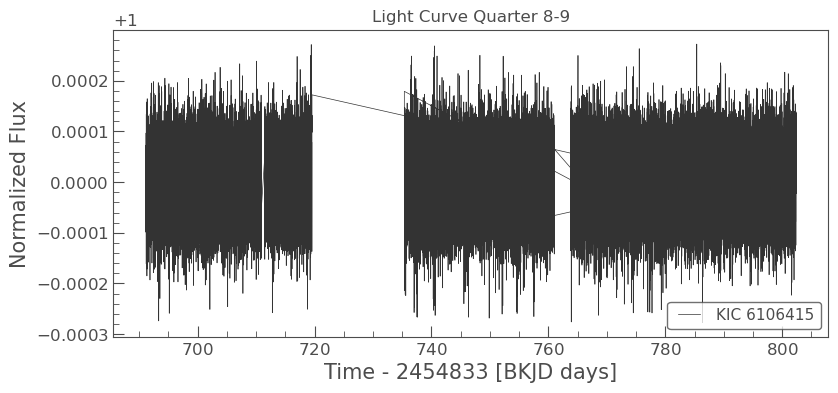

In [47]:
lc = lc_files[6:10].stitch()
plot_lc(lc, "Light Curve Quarter 8-9")

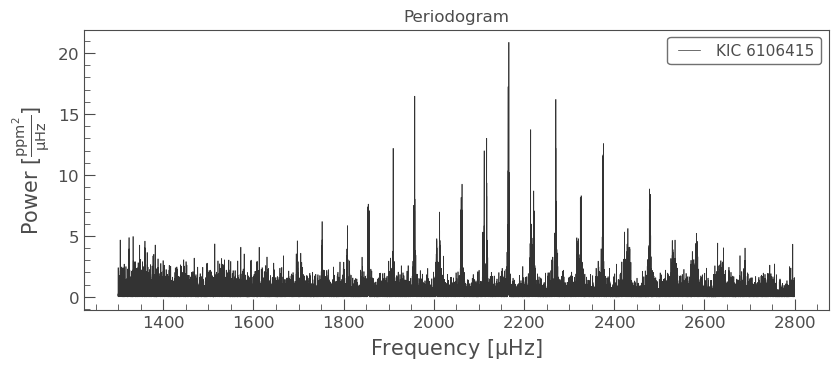

In [37]:
pg_func(lc, 1300, 2800, "Periodogram")

In [23]:
dir_path = '/home/chrisl2324/KIC6106145/New_Fit/mcmc3'

apn.peakbagging.stellar_framework(
        pg.frequency.value, pg.power.value, r = radius, m=mass, teff=teff, dnu=dnu, numax=numax, mcmcDir=dir_path,
        filename_back=os.path.join(dir_path, 'background.png'), 
        filemcmc_back=os.path.join(dir_path, 'mcmc_background.h5'),
        n_order=3, n_order_peakbagging=8, n_harvey=0, power_law=True,
        filename_pattern=os.path.join(dir_path, 'pattern.png'), low_cut = 1600, high_cut_plaw=3000,
        filemcmc_pattern=os.path.join(dir_path, 'mcmc.h5'), 
        parallelise=False,
        progress=True, quickfit=True,
        a2z_file=os.path.join(dir_path, 'modes_param.a2z'), 
        fit_amp=True, 
        fit_splittings=False,
        format_cornerplot='png', 
        filename_peakbagging=os.path.join(dir_path, 'summary_peakbagging.png'), 
        dpi=300)

Beginning fit


100%|███████████████████████████████████████| 1000/1000 [00:35<00:00, 28.02it/s]


Beginning fit


100%|███████████████████████████████████████| 1000/1000 [00:43<00:00, 22.83it/s]


Orders to fit: 16, 17, 18, 19, 20, 21, 22, 23, 24
Fitting on order 16
Window width: 93.1 muHz, with low bound at 1778.6 muHz and up bound at 1871.7 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc3/mcmc_sampler_order_16.h5


100%|███████████████████████████████████████| 1000/1000 [01:04<00:00, 15.39it/s]


Ensemble sampling achieved
Fitting on order 17
Window width: 93.1 muHz, with low bound at 1882.8 muHz and up bound at 1975.9 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc3/mcmc_sampler_order_17.h5


100%|███████████████████████████████████████| 1000/1000 [01:04<00:00, 15.55it/s]


Ensemble sampling achieved
Fitting on order 18
Window width: 93.1 muHz, with low bound at 1987.1 muHz and up bound at 2080.1 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc3/mcmc_sampler_order_18.h5


100%|███████████████████████████████████████| 1000/1000 [01:04<00:00, 15.58it/s]


Ensemble sampling achieved
Fitting on order 19
Window width: 93.0 muHz, with low bound at 2091.4 muHz and up bound at 2184.5 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc3/mcmc_sampler_order_19.h5


100%|███████████████████████████████████████| 1000/1000 [01:04<00:00, 15.47it/s]


Ensemble sampling achieved
Fitting on order 20
Window width: 93.0 muHz, with low bound at 2195.8 muHz and up bound at 2288.8 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc3/mcmc_sampler_order_20.h5


100%|███████████████████████████████████████| 1000/1000 [01:04<00:00, 15.60it/s]


Ensemble sampling achieved
Fitting on order 21
Window width: 93.0 muHz, with low bound at 2300.3 muHz and up bound at 2393.3 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc3/mcmc_sampler_order_21.h5


100%|███████████████████████████████████████| 1000/1000 [01:08<00:00, 14.67it/s]


Ensemble sampling achieved
Fitting on order 22
Window width: 93.0 muHz, with low bound at 2404.8 muHz and up bound at 2497.8 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc3/mcmc_sampler_order_22.h5


100%|███████████████████████████████████████| 1000/1000 [01:10<00:00, 14.28it/s]


Ensemble sampling achieved
Fitting on order 23
Window width: 93.0 muHz, with low bound at 2509.4 muHz and up bound at 2602.4 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc3/mcmc_sampler_order_23.h5


100%|███████████████████████████████████████| 1000/1000 [01:01<00:00, 16.16it/s]


Ensemble sampling achieved
Fitting on order 24
Window width: 93.0 muHz, with low bound at 2614.1 muHz and up bound at 2707.1 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc3/mcmc_sampler_order_24.h5


100%|███████████████████████████████████████| 1000/1000 [01:06<00:00, 14.93it/s]


Ensemble sampling achieved


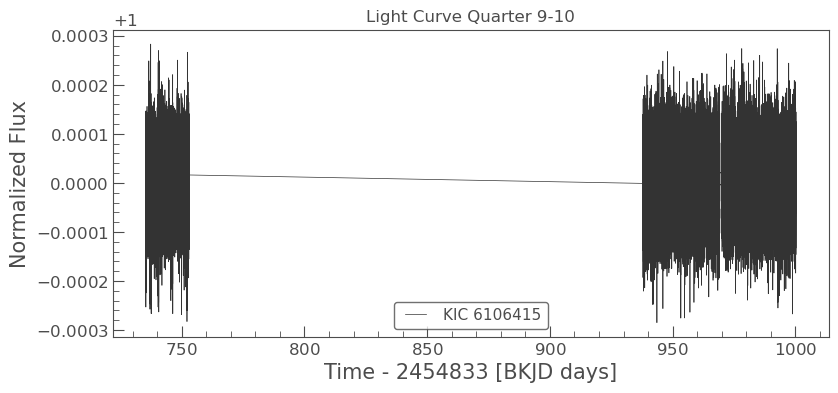

In [51]:
lc = lc_files[9:12].stitch()
plot_lc(lc, "Light Curve Quarter 9-10")

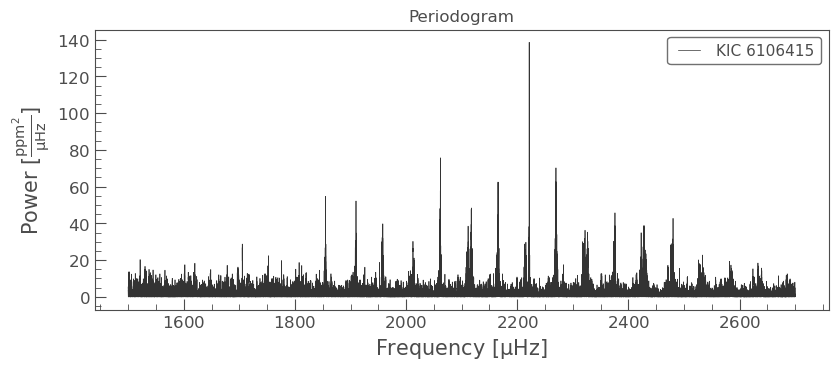

In [49]:
pg_func(lc, 1500, 2700, "Periodogram")

In [31]:
import os

dir_path = '/home/chrisl2324/KIC6106145/New_Fit/mcmc4'

apn.peakbagging.stellar_framework(
        pg.frequency.value, pg.power.value, r = radius, m=mass, teff=teff, dnu=dnu, numax=numax, mcmcDir=dir_path,
        filename_back=os.path.join(dir_path, 'background.png'), 
        filemcmc_back=os.path.join(dir_path, 'mcmc_background.h5'),
        n_order=3, n_order_peakbagging=8, n_harvey=0, power_law=True,
        filename_pattern=os.path.join(dir_path, 'pattern.png'), low_cut = 1600, high_cut_plaw=3000,
        filemcmc_pattern=os.path.join(dir_path, 'mcmc.h5'), 
        parallelise=False,
        progress=True, quickfit=True,
        a2z_file=os.path.join(dir_path, 'modes_param.a2z'), 
        fit_amp=True, 
        fit_splittings=False,
        format_cornerplot='png', 
        filename_peakbagging=os.path.join(dir_path, 'summary_peakbagging.png'), 
        dpi=300)

Beginning fit


100%|███████████████████████████████████████| 1000/1000 [00:46<00:00, 21.69it/s]


Beginning fit


100%|███████████████████████████████████████| 1000/1000 [02:35<00:00,  6.42it/s]


Orders to fit: 16, 17, 18, 19, 20, 21, 22, 23, 24
Fitting on order 16
Window width: 90.6 muHz, with low bound at 1781.5 muHz and up bound at 1872.0 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc4/mcmc_sampler_order_16.h5


100%|███████████████████████████████████████| 1000/1000 [01:31<00:00, 10.97it/s]


Ensemble sampling achieved
Fitting on order 17
Window width: 90.9 muHz, with low bound at 1884.9 muHz and up bound at 1975.8 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc4/mcmc_sampler_order_17.h5


100%|███████████████████████████████████████| 1000/1000 [01:41<00:00,  9.86it/s]


Ensemble sampling achieved
Fitting on order 18
Window width: 91.2 muHz, with low bound at 1988.6 muHz and up bound at 2079.8 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc4/mcmc_sampler_order_18.h5


100%|███████████████████████████████████████| 1000/1000 [01:34<00:00, 10.63it/s]


Ensemble sampling achieved
Fitting on order 19
Window width: 91.5 muHz, with low bound at 2092.5 muHz and up bound at 2184.0 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc4/mcmc_sampler_order_19.h5


100%|███████████████████████████████████████| 1000/1000 [01:27<00:00, 11.44it/s]


Ensemble sampling achieved
Fitting on order 20
Window width: 91.8 muHz, with low bound at 2196.6 muHz and up bound at 2288.4 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc4/mcmc_sampler_order_20.h5


100%|███████████████████████████████████████| 1000/1000 [01:27<00:00, 11.46it/s]


Ensemble sampling achieved
Fitting on order 21
Window width: 92.1 muHz, with low bound at 2300.9 muHz and up bound at 2393.0 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc4/mcmc_sampler_order_21.h5


100%|███████████████████████████████████████| 1000/1000 [01:27<00:00, 11.46it/s]


Ensemble sampling achieved
Fitting on order 22
Window width: 92.5 muHz, with low bound at 2405.4 muHz and up bound at 2497.9 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc4/mcmc_sampler_order_22.h5


100%|███████████████████████████████████████| 1000/1000 [01:27<00:00, 11.48it/s]


Ensemble sampling achieved
Fitting on order 23
Window width: 92.8 muHz, with low bound at 2510.2 muHz and up bound at 2602.9 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc4/mcmc_sampler_order_23.h5


100%|███████████████████████████████████████| 1000/1000 [01:26<00:00, 11.58it/s]


Ensemble sampling achieved
Fitting on order 24
Window width: 93.1 muHz, with low bound at 2615.1 muHz and up bound at 2708.2 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc4/mcmc_sampler_order_24.h5


100%|███████████████████████████████████████| 1000/1000 [00:26<00:00, 37.47it/s]


Ensemble sampling achieved


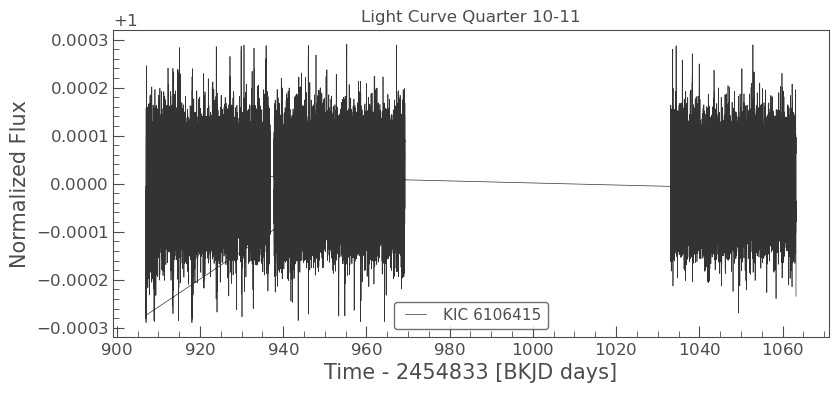

In [50]:
lc = lc_files[11:14].stitch()
plot_lc(lc, "Light Curve Quarter 10-11")

<Axes: xlabel='Frequency [$\\mathrm{\\mu Hz}$]', ylabel='Power [$\\mathrm{\\frac{1}{\\mu Hz}}$]'>

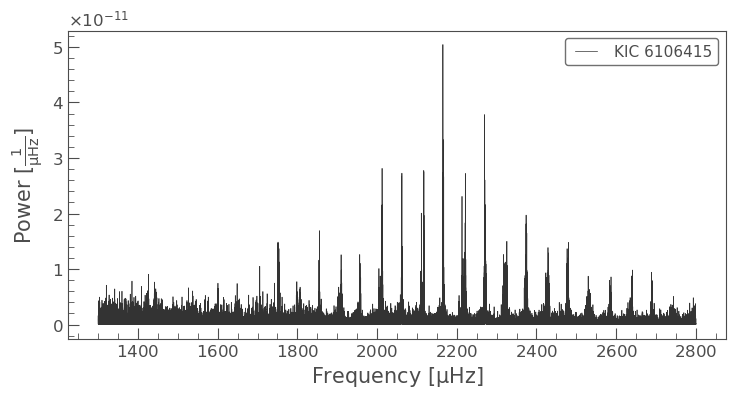

In [35]:
pg = lc.to_periodogram(method='lombscargle', normalization='psd', oversample_factor = 10, minimum_frequency=1300, maximum_frequency = 2800)
pg.plot()

In [36]:
import os

dir_path = '/home/chrisl2324/KIC6106145/New_Fit/mcmc5'

apn.peakbagging.stellar_framework(
        pg.frequency.value, pg.power.value, r = radius, m=mass, teff=teff, dnu=dnu, numax=numax, mcmcDir=dir_path,
        filename_back=os.path.join(dir_path, 'background.png'), 
        filemcmc_back=os.path.join(dir_path, 'mcmc_background.h5'),
        n_order=3, n_order_peakbagging=8, n_harvey=0, power_law=True,
        filename_pattern=os.path.join(dir_path, 'pattern.png'), low_cut = 1600, high_cut_plaw=3000,
        filemcmc_pattern=os.path.join(dir_path, 'mcmc.h5'), 
        parallelise=False,
        progress=True, quickfit=True,
        a2z_file=os.path.join(dir_path, 'modes_param.a2z'), 
        fit_amp=True, 
        fit_splittings=False,
        format_cornerplot='png', 
        filename_peakbagging=os.path.join(dir_path, 'summary_peakbagging.png'), 
        dpi=300)

Beginning fit


100%|███████████████████████████████████████| 1000/1000 [00:44<00:00, 22.55it/s]


Beginning fit


100%|███████████████████████████████████████| 1000/1000 [01:10<00:00, 14.26it/s]


Orders to fit: 16, 17, 18, 19, 20, 21, 22, 23, 24
Fitting on order 16
Window width: 95.6 muHz, with low bound at 1780.1 muHz and up bound at 1875.7 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc5/mcmc_sampler_order_16.h5


100%|███████████████████████████████████████| 1000/1000 [01:21<00:00, 12.23it/s]


Ensemble sampling achieved
Fitting on order 17
Window width: 95.1 muHz, with low bound at 1883.1 muHz and up bound at 1978.2 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc5/mcmc_sampler_order_17.h5


100%|███████████████████████████████████████| 1000/1000 [01:22<00:00, 12.13it/s]


Ensemble sampling achieved
Fitting on order 18
Window width: 94.5 muHz, with low bound at 1986.7 muHz and up bound at 2081.2 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc5/mcmc_sampler_order_18.h5


100%|███████████████████████████████████████| 1000/1000 [01:20<00:00, 12.46it/s]


Ensemble sampling achieved
Fitting on order 19
Window width: 94.0 muHz, with low bound at 2090.8 muHz and up bound at 2184.8 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc5/mcmc_sampler_order_19.h5


100%|███████████████████████████████████████| 1000/1000 [01:21<00:00, 12.30it/s]


Ensemble sampling achieved
Fitting on order 20
Window width: 93.4 muHz, with low bound at 2195.5 muHz and up bound at 2289.0 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc5/mcmc_sampler_order_20.h5


100%|███████████████████████████████████████| 1000/1000 [01:12<00:00, 13.89it/s]


Ensemble sampling achieved
Fitting on order 21
Window width: 92.9 muHz, with low bound at 2300.8 muHz and up bound at 2393.7 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc5/mcmc_sampler_order_21.h5


100%|███████████████████████████████████████| 1000/1000 [01:08<00:00, 14.58it/s]


Ensemble sampling achieved
Fitting on order 22
Window width: 92.4 muHz, with low bound at 2406.7 muHz and up bound at 2499.0 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc5/mcmc_sampler_order_22.h5


100%|███████████████████████████████████████| 1000/1000 [01:08<00:00, 14.54it/s]


Ensemble sampling achieved
Fitting on order 23
Window width: 91.8 muHz, with low bound at 2513.1 muHz and up bound at 2604.9 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc5/mcmc_sampler_order_23.h5


100%|███████████████████████████████████████| 1000/1000 [01:08<00:00, 14.60it/s]


Ensemble sampling achieved
Fitting on order 24
Window width: 91.3 muHz, with low bound at 2620.1 muHz and up bound at 2711.4 muHz
Chain will be saved at: /home/chrisl2324/KIC6106145/New_Fit/mcmc5/mcmc_sampler_order_24.h5


100%|███████████████████████████████████████| 1000/1000 [01:08<00:00, 14.60it/s]


Ensemble sampling achieved


In [1]:
import pandas as pd

dfs_pkb = []
for i in range(13):
    filename = f'/home/chrisl2324/KIC6106145/New_Fit/mcmc{i}/modes_param.pkb'
    dfs_pkb.append(pd.read_csv(filename, sep=' ', header=None, names=['N', 'L_value', 'Nu', 'sigma', 'Ampl.', 'sigma_Ampl.', 'width', 'sigma_width','angle', 'sigma_angle', 'split', 'sigma_split', 'asym', 'sigma_asym'], skiprows=13))

In [2]:
dfs_pkb[1]

,N,L_value,Nu,sigma,Ampl.,sigma_Ampl.,width,sigma_width,angle,sigma_angle,split,sigma_split,asym,sigma_asym
0,15,2,1799.3981,0.1327,0.0,0.0,1.7270,0.1414,90.0,0.0,0.0,0.0,0.0,0.0
1,16,0,1807.9438,0.1013,0.0,0.0,1.7270,0.1414,90.0,0.0,0.0,0.0,0.0,0.0
2,16,1,1854.3635,0.0738,0.0,0.0,1.7270,0.1414,90.0,0.0,0.0,0.0,0.0,0.0
3,16,2,1902.4872,0.2023,0.0,0.0,2.6457,0.1552,90.0,0.0,0.0,0.0,0.0,0.0
4,17,0,1909.5532,0.1162,0.0,0.0,2.6457,0.1552,90.0,0.0,0.0,0.0,0.0,0.0
5,17,1,1957.0131,0.0772,0.0,0.0,2.6457,0.1552,90.0,0.0,0.0,0.0,0.0,0.0
6,17,2,2006.1782,0.0945,0.0,0.0,1.7947,0.1017,90.0,0.0,0.0,0.0,0.0,0.0
7,18,0,2012.8504,0.0693,0.0,0.0,1.7947,0.1017,90.0,0.0,0.0,0.0,0.0,0.0
8,18,1,2061.5151,0.0551,0.0,0.0,1.7947,0.1017,90.0,0.0,0.0,0.0,0.0,0.0
9,18,2,2110.4239,0.1040,0.0,0.0,1.9840,0.0896,90.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# N value was off by 1
for df in dfs_pkb:
    df.loc[df['L_value'] == 0, 'N'] = df['N'] - 1

In [4]:
# Corrected pkb value
dfs_pkb[1]

,N,L_value,Nu,sigma,Ampl.,sigma_Ampl.,width,sigma_width,angle,sigma_angle,split,sigma_split,asym,sigma_asym
0,15,2,1799.3981,0.1327,0.0,0.0,1.7270,0.1414,90.0,0.0,0.0,0.0,0.0,0.0
1,15,0,1807.9438,0.1013,0.0,0.0,1.7270,0.1414,90.0,0.0,0.0,0.0,0.0,0.0
2,16,1,1854.3635,0.0738,0.0,0.0,1.7270,0.1414,90.0,0.0,0.0,0.0,0.0,0.0
3,16,2,1902.4872,0.2023,0.0,0.0,2.6457,0.1552,90.0,0.0,0.0,0.0,0.0,0.0
4,16,0,1909.5532,0.1162,0.0,0.0,2.6457,0.1552,90.0,0.0,0.0,0.0,0.0,0.0
5,17,1,1957.0131,0.0772,0.0,0.0,2.6457,0.1552,90.0,0.0,0.0,0.0,0.0,0.0
6,17,2,2006.1782,0.0945,0.0,0.0,1.7947,0.1017,90.0,0.0,0.0,0.0,0.0,0.0
7,17,0,2012.8504,0.0693,0.0,0.0,1.7947,0.1017,90.0,0.0,0.0,0.0,0.0,0.0
8,18,1,2061.5151,0.0551,0.0,0.0,1.7947,0.1017,90.0,0.0,0.0,0.0,0.0,0.0
9,18,2,2110.4239,0.1040,0.0,0.0,1.9840,0.0896,90.0,0.0,0.0,0.0,0.0,0.0


In [36]:
import matplotlib.pyplot as plt

def plot_frequency_variation(
    N_values, dfs_pkb, output_dir, L_value=0, convert_to_mHz=True
):
    """
    Plots frequency variations for a given range of N values and saves the plots.

    Parameters:
        N_values (list): List of N values to process.
        dfs_pkb (list): List of pandas DataFrames containing the data.
        output_dir (str): Directory to save the plots.
        L_value (int, optional): The L_value to filter (default 0).
        convert_to_mHz (bool, optional): Whether to convert frequencies to mHz (default True).
    """
    # Dictionaries to store indices and values
    indices_dict = {}
    values_dict = {}
    std_values_dict = {}

    # Loop over N values 
    for N in N_values:
        frequency_data = []

        # Loop through each DataFrame
        for index, df in enumerate(dfs_pkb):
            # Filter rows by N and L_value
            filtered_rows = df[(df['N'] == N) & (df['L_value'] == L_value)]
            if not filtered_rows.empty:
                frequency_data.extend([
                    (index, row['Nu'], row['sigma']) for _, row in filtered_rows.iterrows()
                ])

        # Store indices, frequencies, and standard deviations
        indices_dict[N] = [idx for idx, _, _ in frequency_data]
        values_dict[N] = [
            value * 1e-3 if convert_to_mHz else value for _, value, _ in frequency_data
        ]
        std_values_dict[N] = [
            sigma * 1e-3 if convert_to_mHz else sigma for _, _, sigma in frequency_data
        ]

    # Plot frequencies for each N value
    for N in N_values:
        # Retrieve stored data
        indices = indices_dict.get(N, [])
        values = values_dict.get(N, [])
        std_values = std_values_dict.get(N, [])

        # Skip if no data for the current N
        if not values:
            continue

        # Create the plot
        plt.figure(figsize=(10, 6))
        plt.errorbar(
            timestamps,
            values,
            yerr=std_values,
            fmt='o',
            ecolor='red',
            capsize=3,
            label='Error'
        )
        plt.xlabel('Observation Index', fontsize=14)
        plt.ylabel('Frequency (mHz)' if convert_to_mHz else 'Frequency (Hz)', fontsize=14)
        plt.title(f'N = {N}, L = {L_value}', fontsize=16, fontweight='bold')
        plt.grid(visible=True, linestyle='--', alpha=0.7)
        plt.legend(fontsize=12, loc='upper right')
        plt.tight_layout()

        # Save the plot
        '''output_path = f"{output_dir}/N_{N}_L{L_value}.png"
        plt.savefig(output_path, dpi=300)
        plt.close()

        print(f"Saved plot for N = {N}, L = {L_value} at {output_path}")'''
    return indices_dict, values_dict, std_values_dict


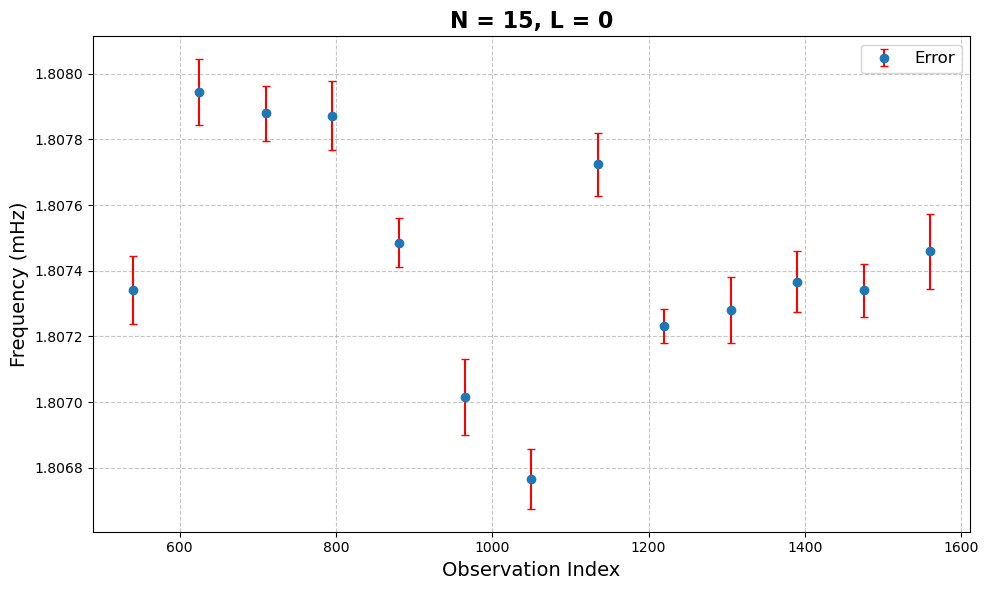

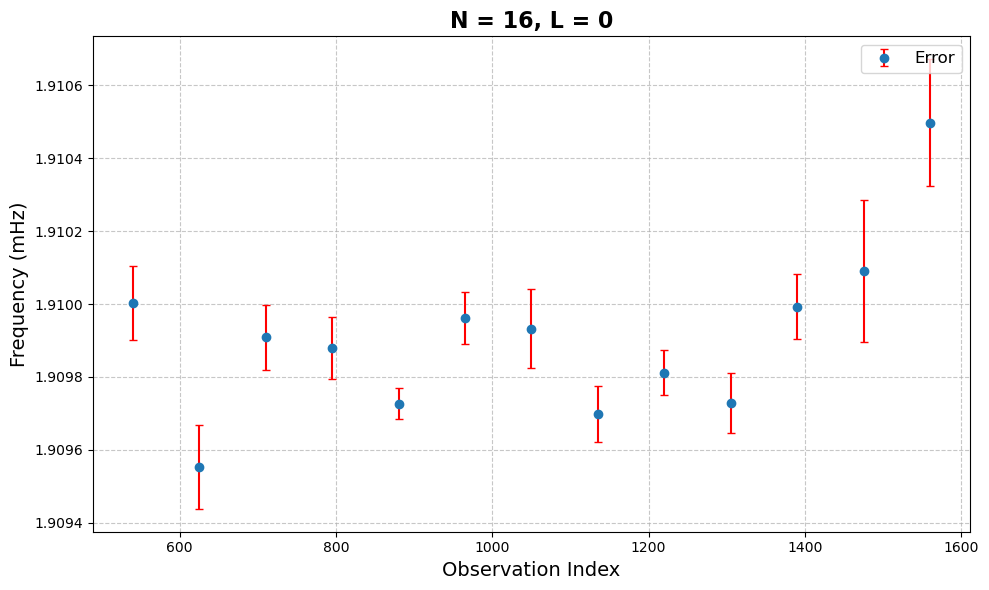

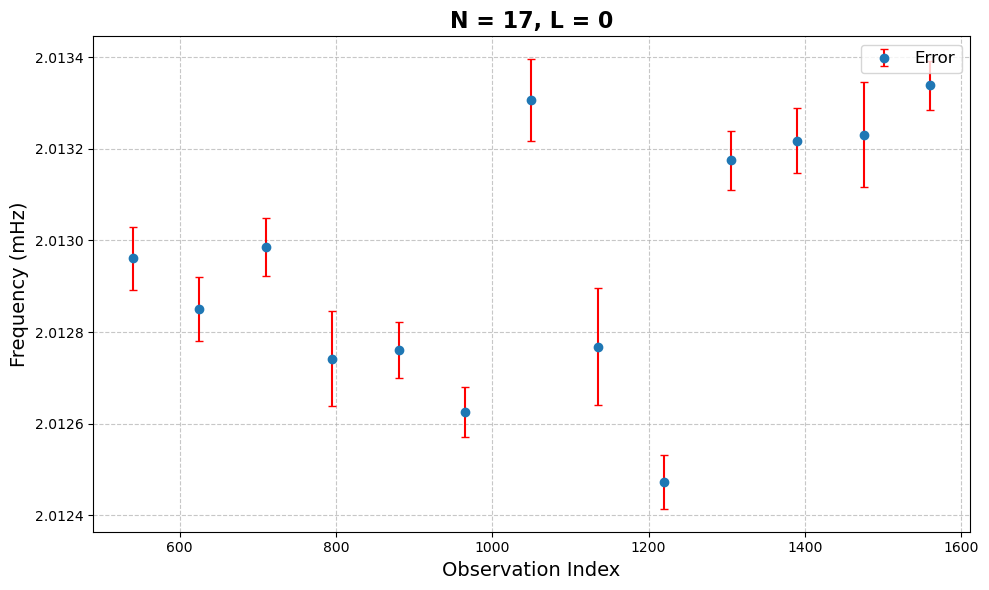

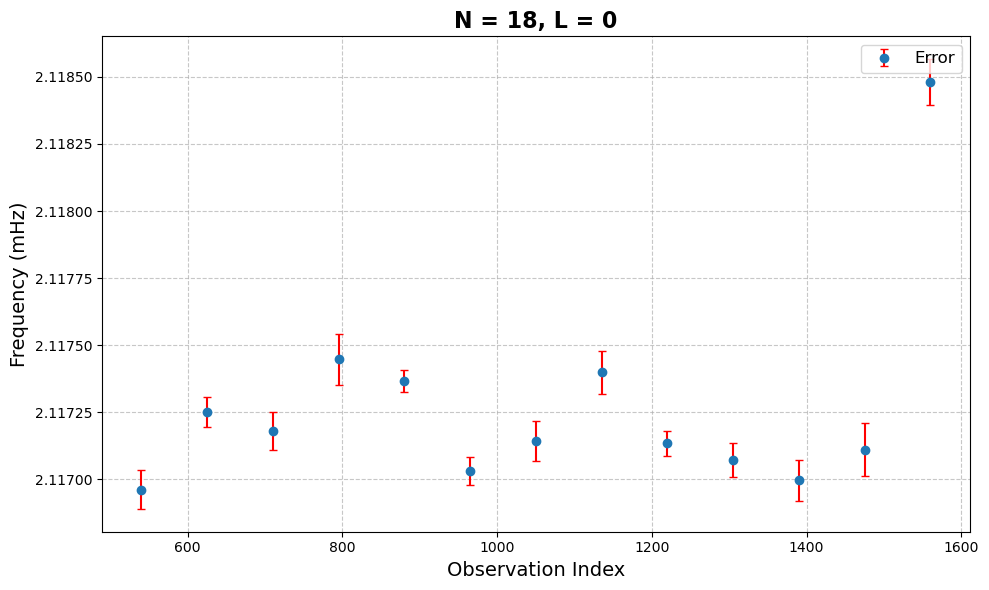

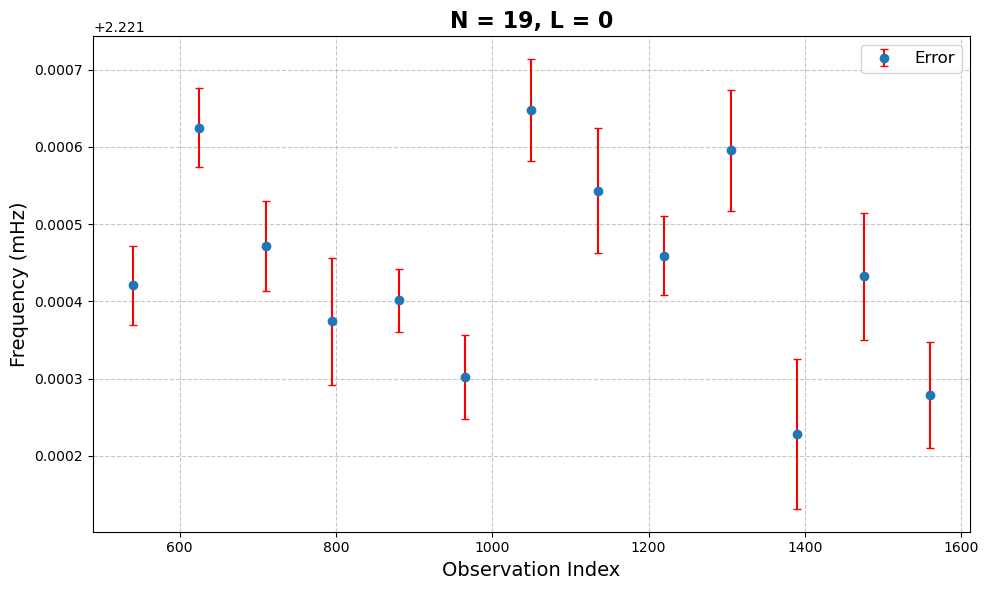

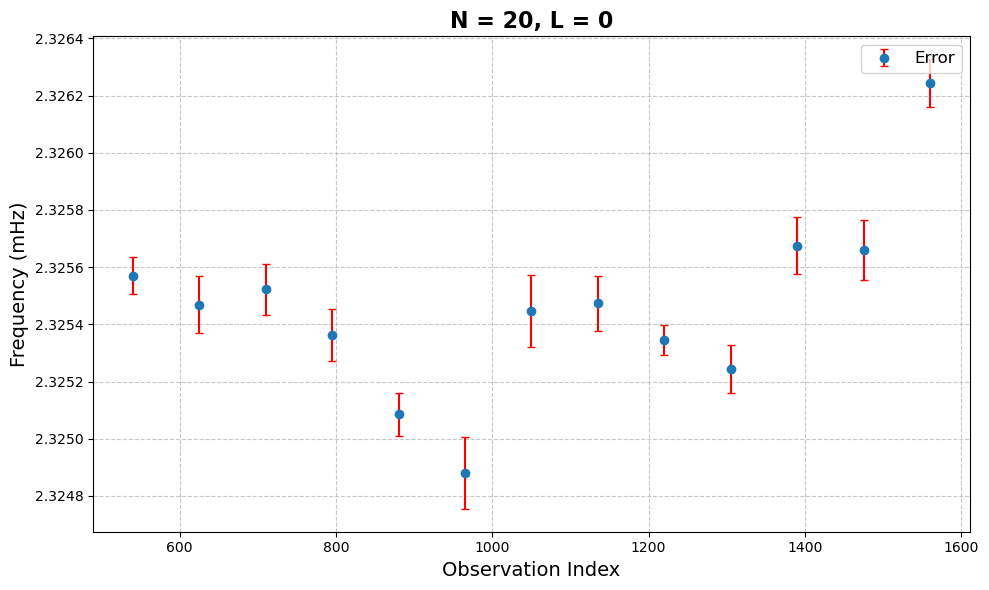

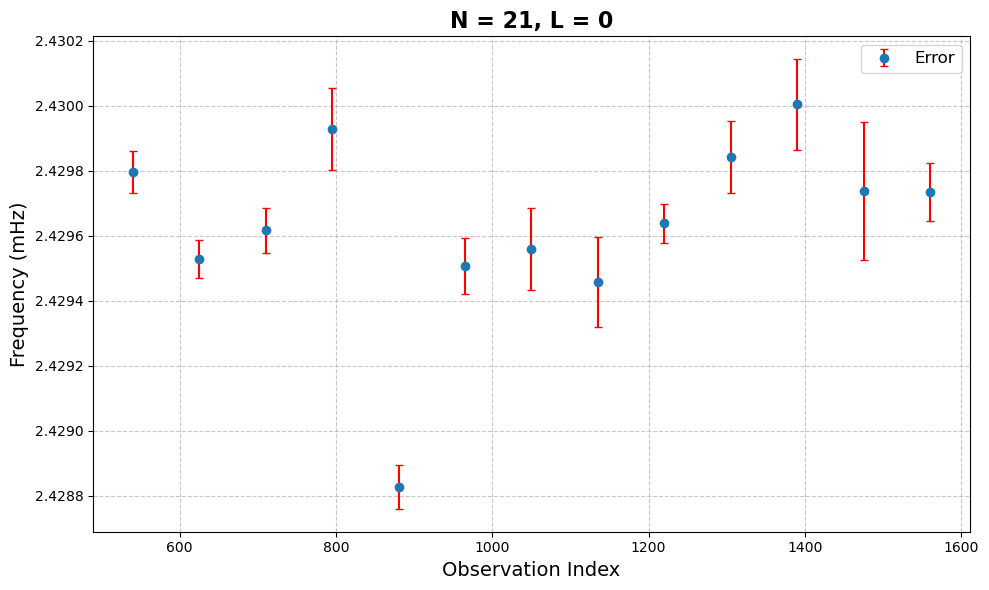

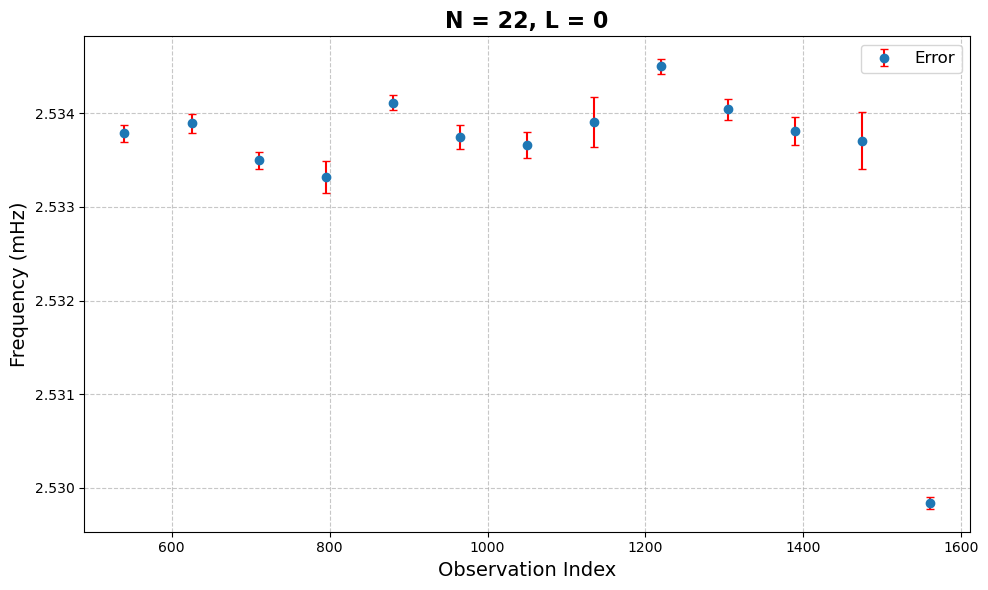

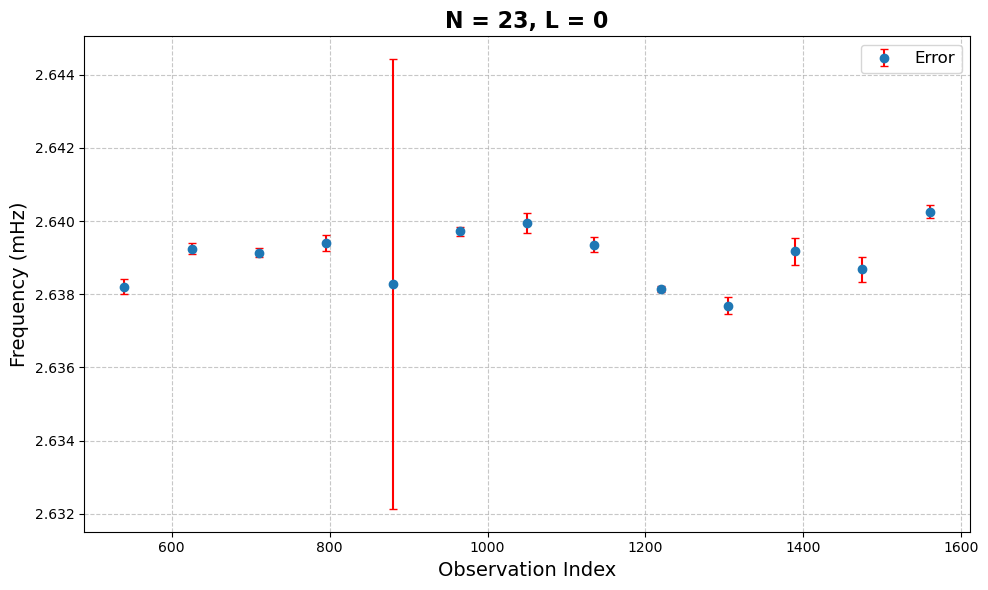

In [37]:
indices_dict_l0, values_dict_l0, std_values_dict_l0 = plot_frequency_variation(
    N_values=range(15, 24),
    dfs_pkb=dfs_pkb,
    output_dir=None,  
    L_value=0,
    convert_to_mHz=True
)

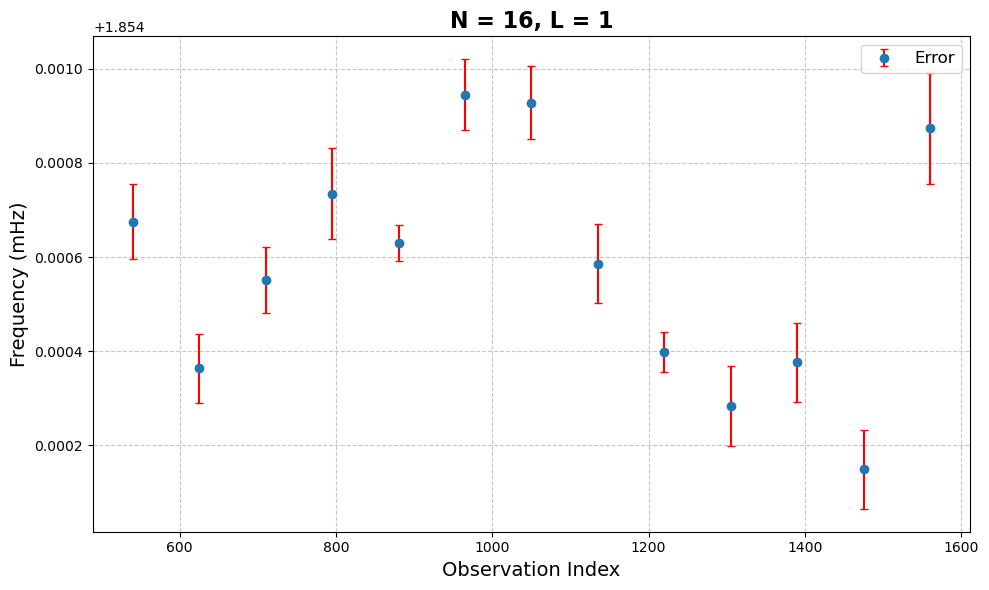

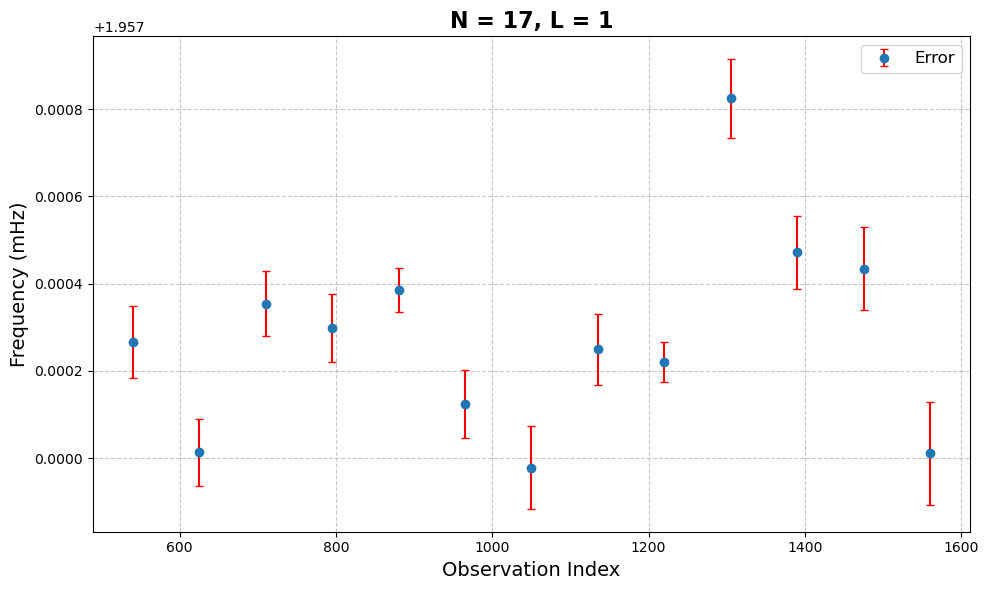

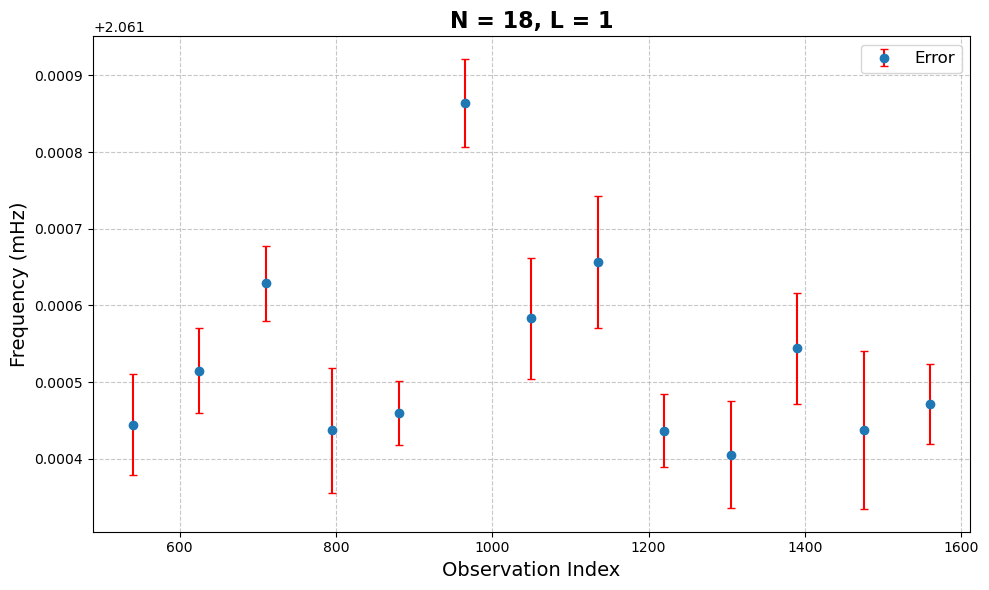

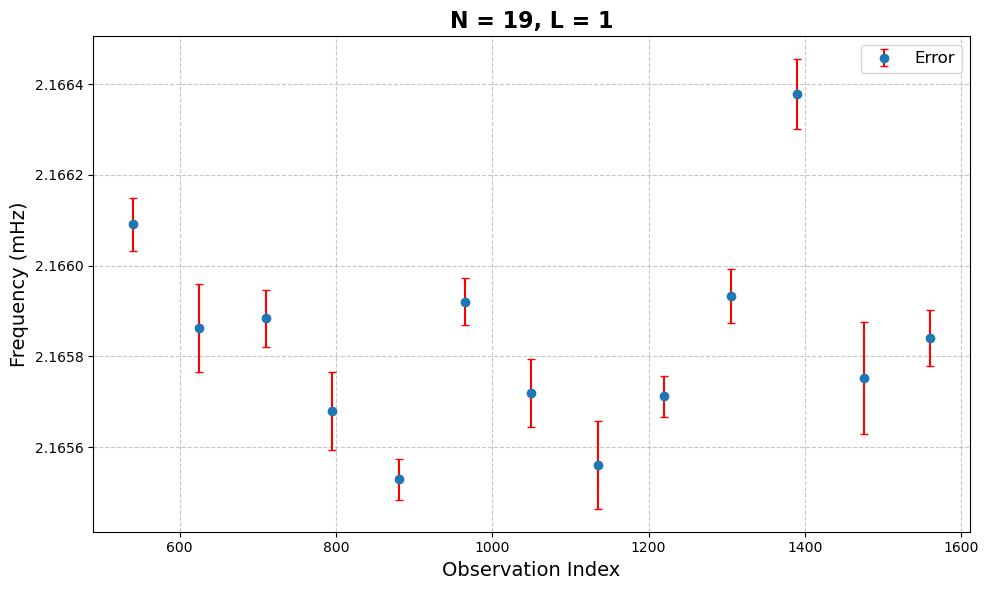

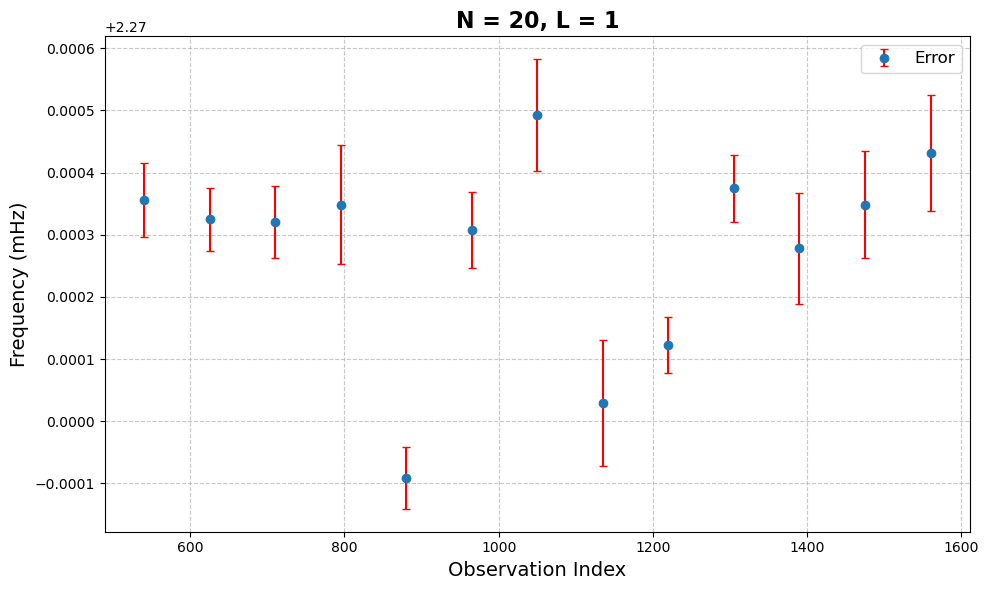

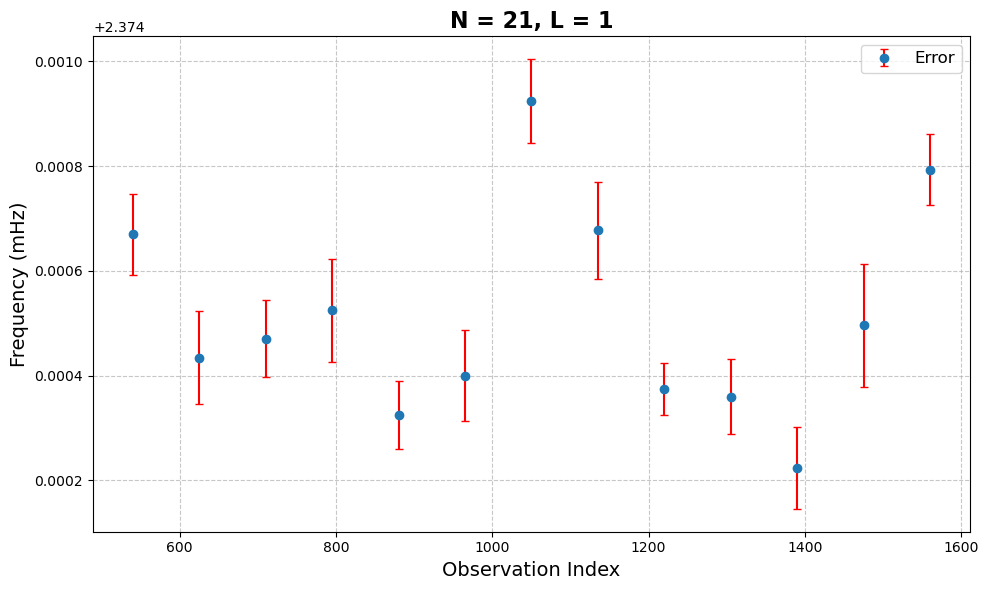

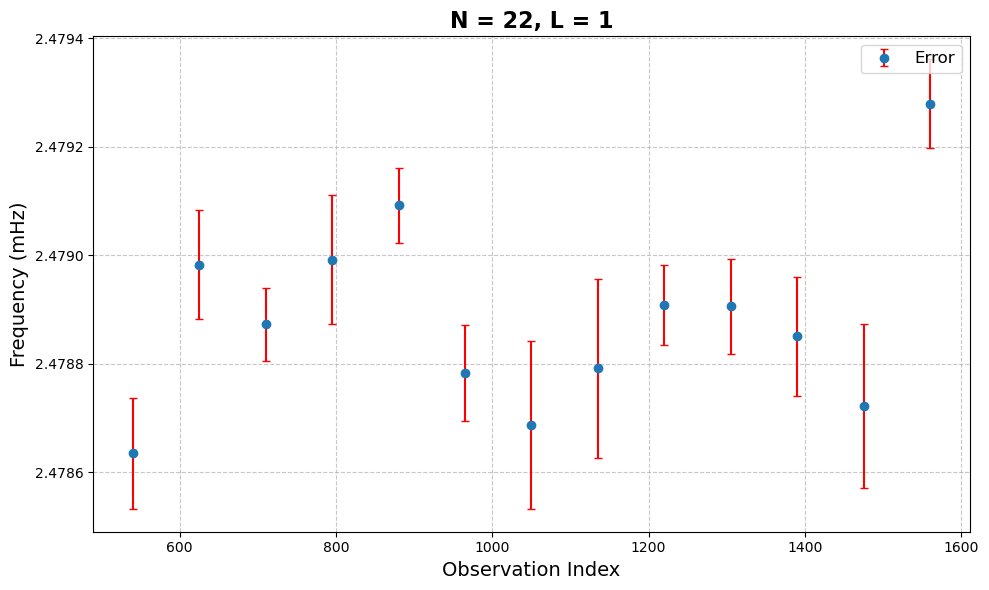

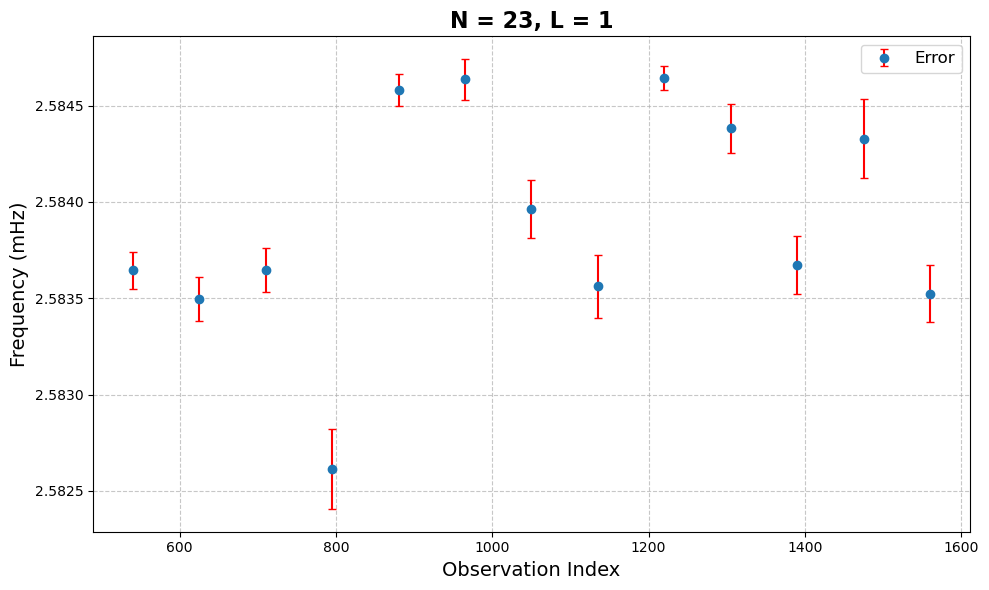

In [38]:
indices_dict_l1, values_dict_l1, std_values_dict_l1 = plot_frequency_variation(
    N_values=range(16, 24),
    dfs_pkb=dfs_pkb,
    output_dir=None, 
    L_value=1,
    convert_to_mHz=True
)

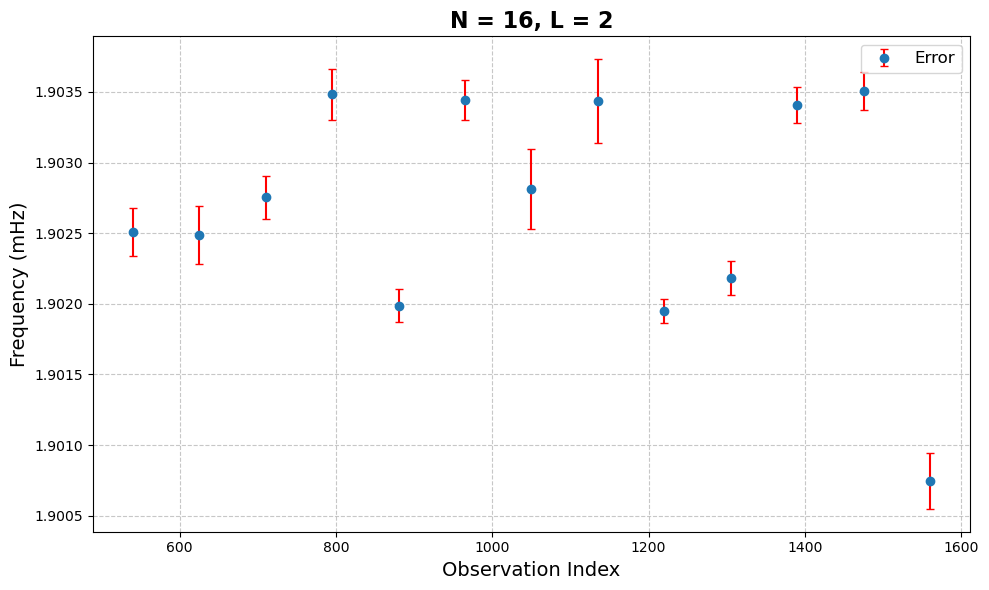

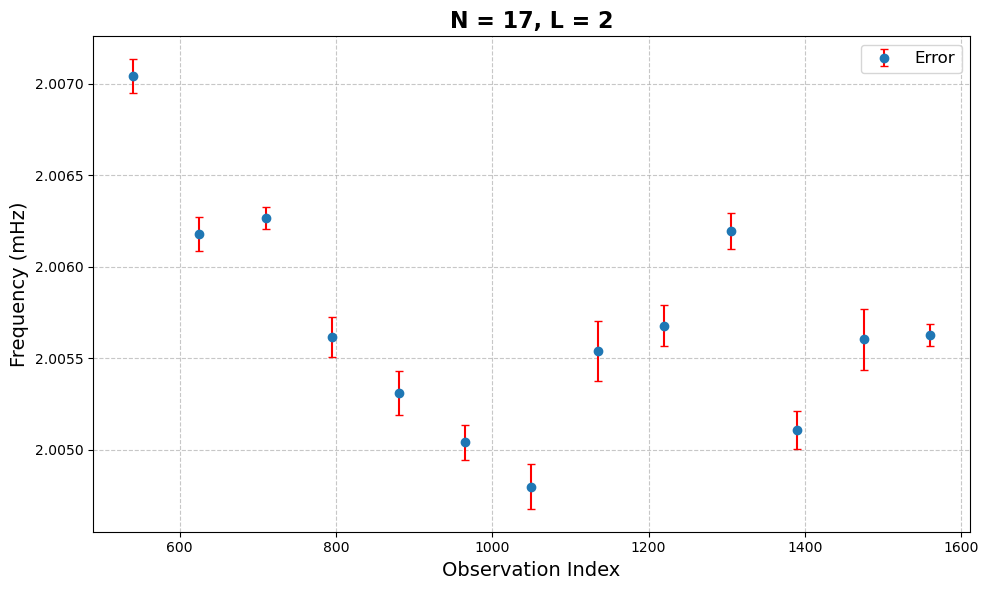

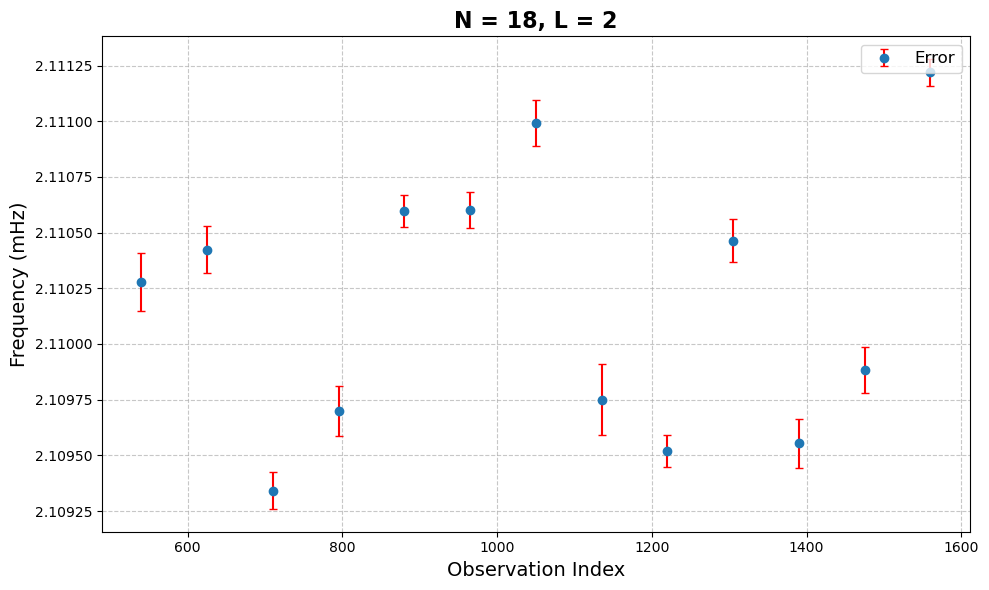

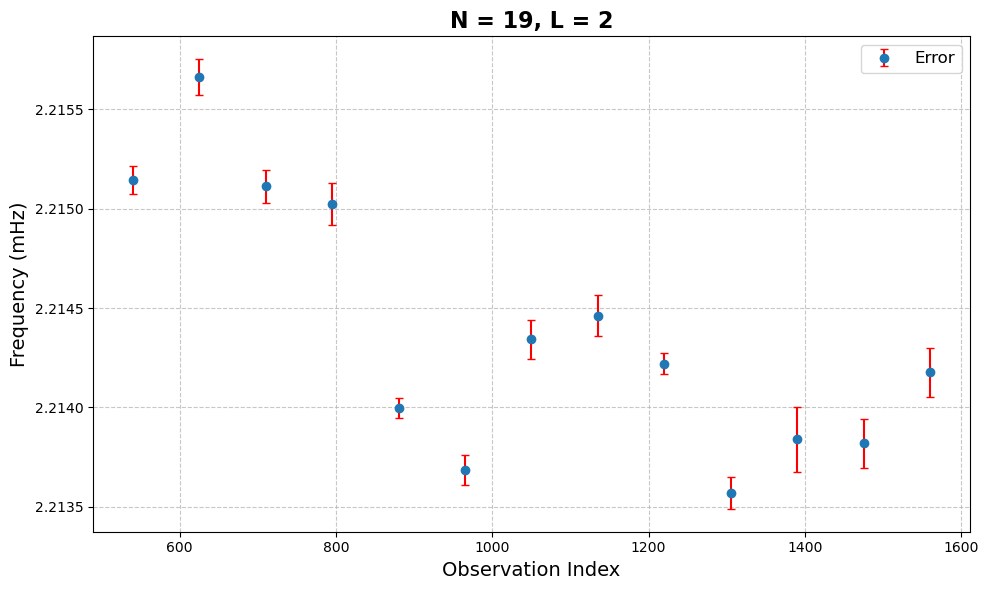

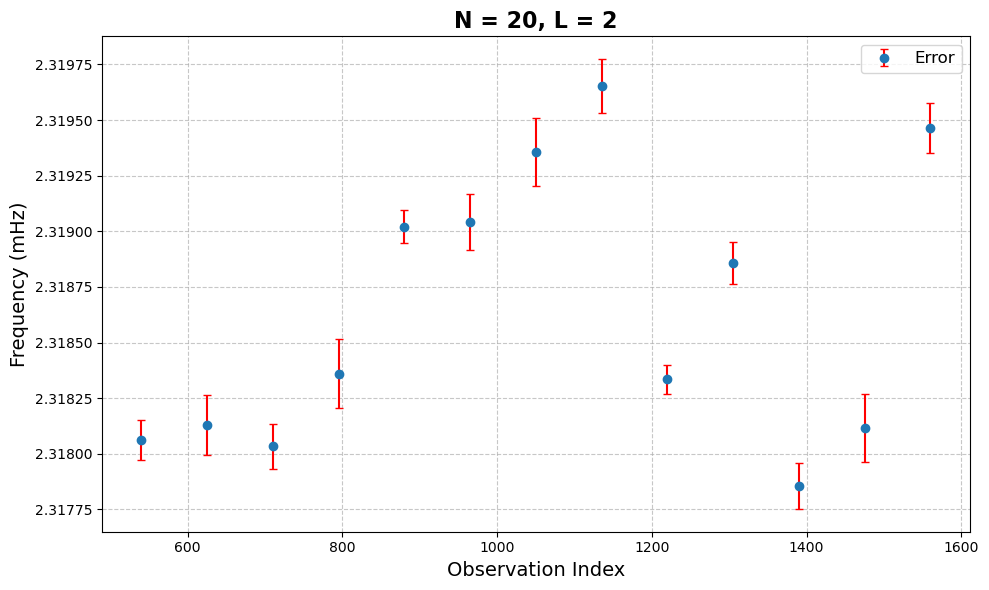

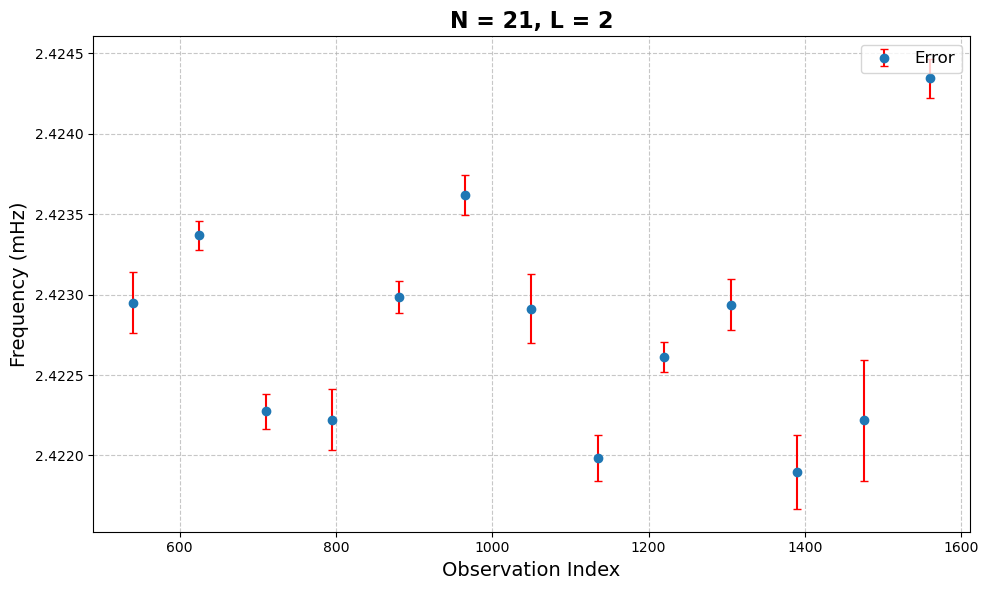

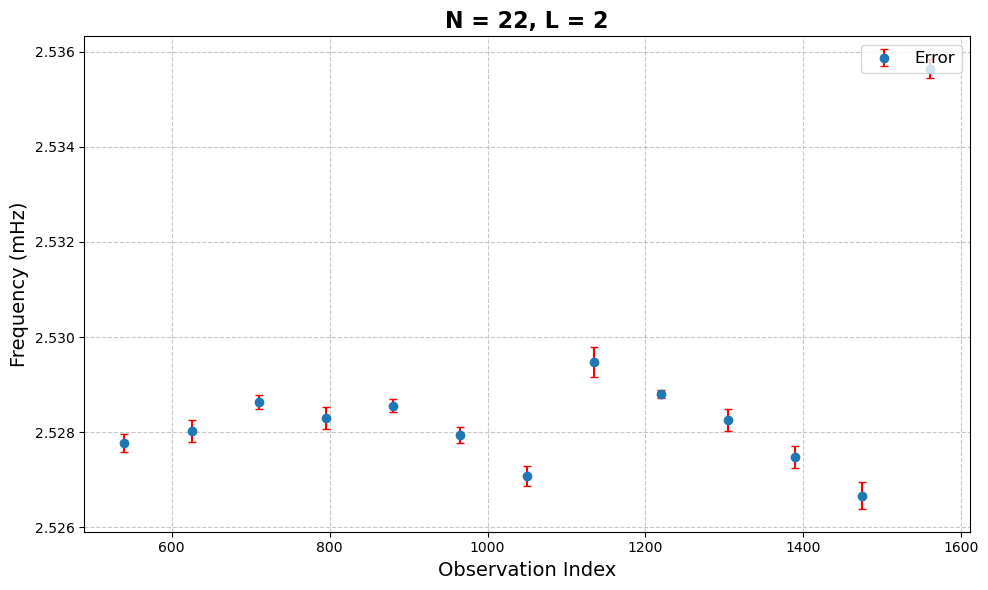

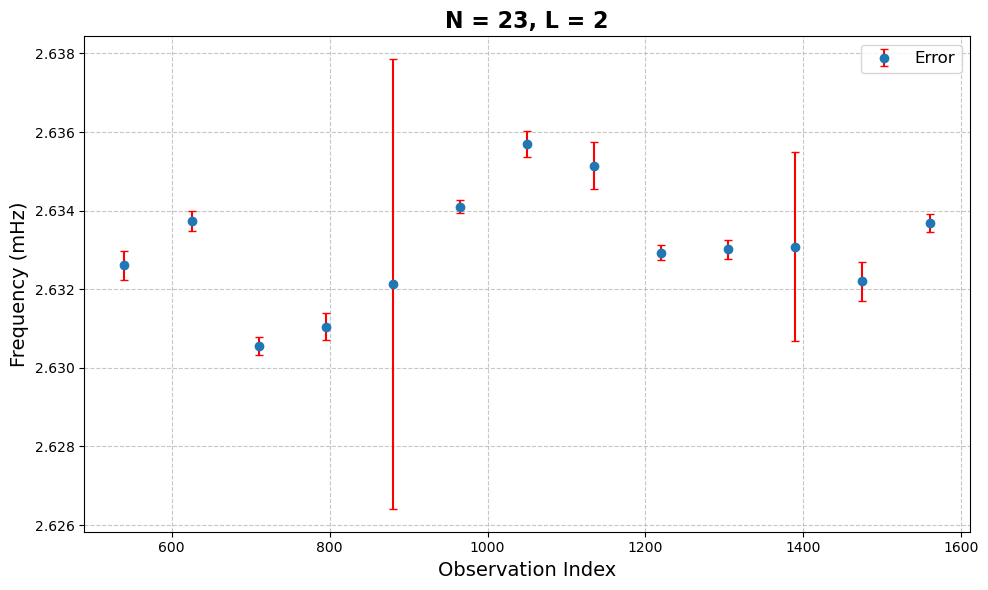

In [39]:
indices_dict_l2, values_dict_l2, std_values_dict_l2 = plot_frequency_variation(
    N_values=range(16, 24),
    dfs_pkb=dfs_pkb,
    output_dir=None,  
    L_value=2,
    convert_to_mHz=True
)

In [23]:
# L = 0
values_l0 = [values_dict_l0[i] for i in range(15, 24)]
mean_values_l0 = [np.mean(value) for value in values_l0]
std_values_l0 = [np.std(value) for value in values_l0]

# L = 1
values_l1 = [values_dict_l1[i] for i in range(16, 24)]
mean_values_l1 = [np.mean(value) for value in values_l1]
std_values_l1 = [np.std(value) for value in values_l1]

# L = 2
values_l2 = [values_dict_l2[i] for i in range(16, 24)]
mean_values_l2 = [np.mean(value) for value in values_l2]
std_values_l2 = [np.std(value) for value in values_l2]

In [24]:
# Compute relative variations
relative_variations_l0 = [(np.array(value) - np.mean(value))/np.mean(value) for value in values_l0]
relative_variations_l1 = [(np.array(value) - np.mean(value))/np.mean(value) for value in values_l1]
relative_variations_l2 = [(np.array(value) - np.mean(value))/np.mean(value) for value in values_l2]

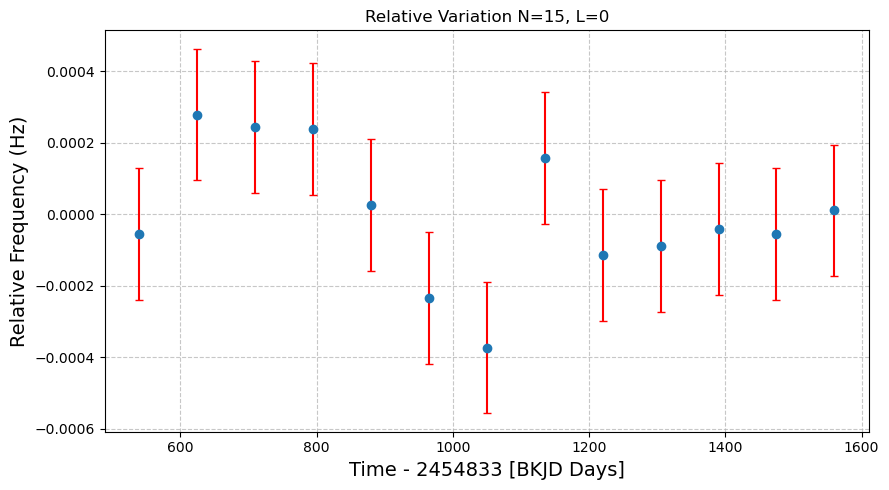

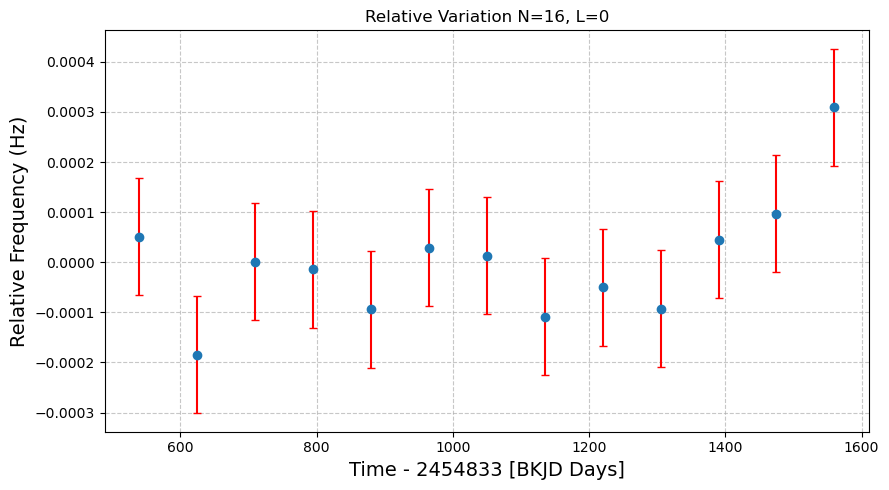

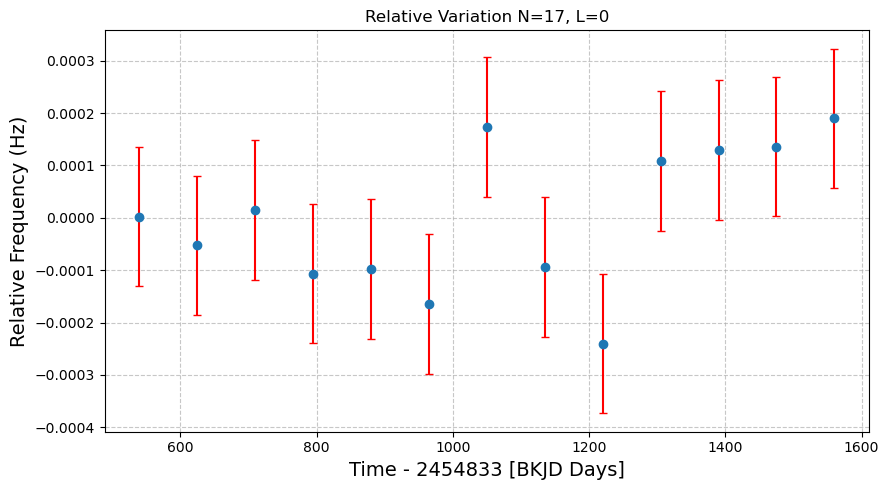

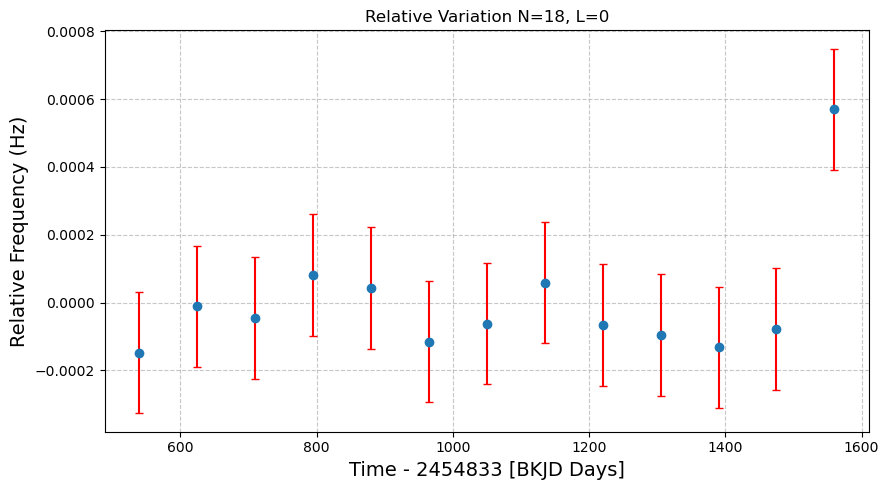

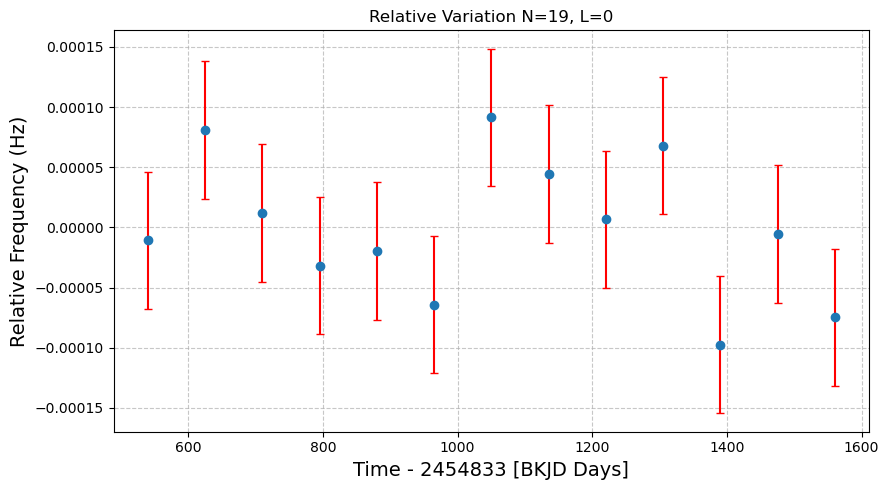

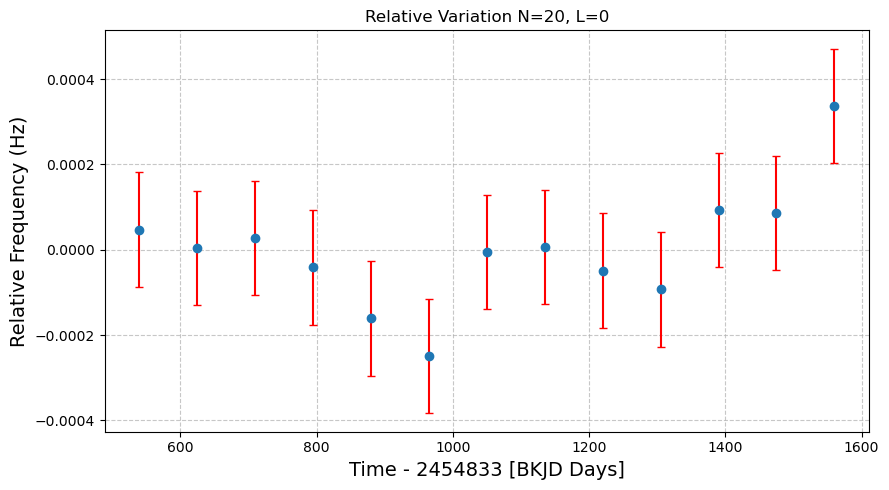

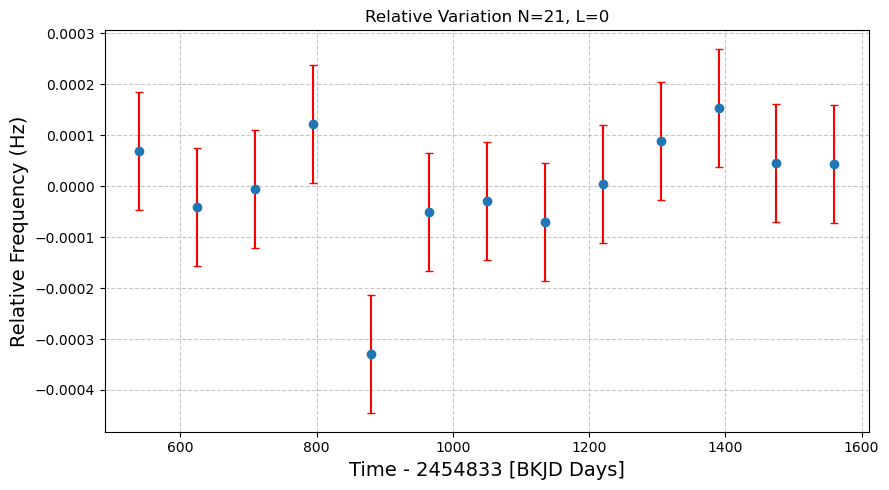

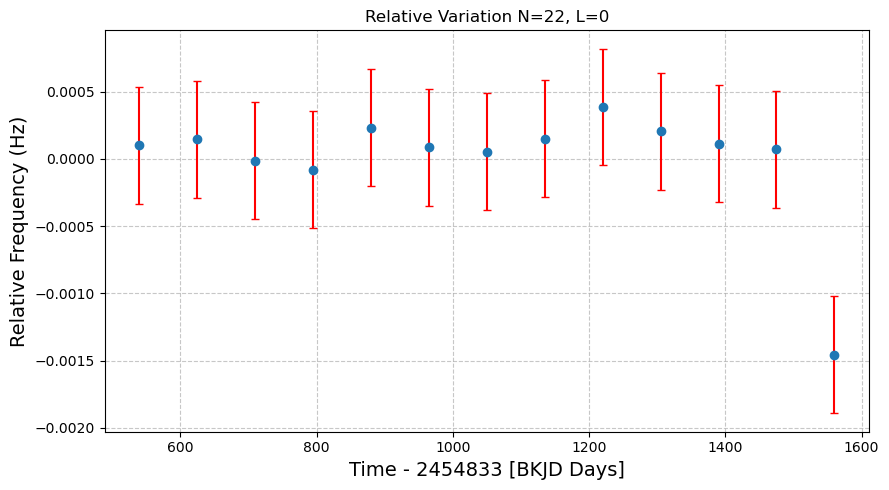

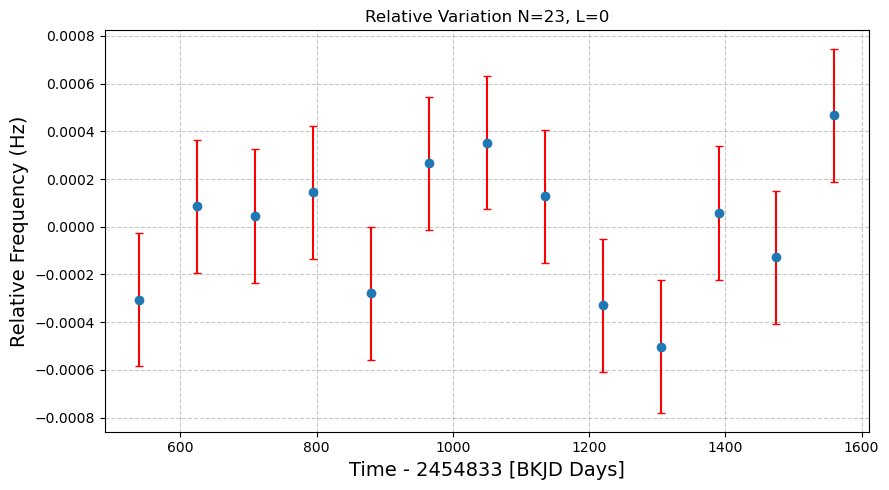

In [30]:
for i in range(len(relative_variations_l0)):
    fig, ax = plt.subplots(figsize=(9,5))
    plt.errorbar(timestamps, relative_variations_l0[i], yerr=np.array(std_values_l0)[i]/values_l0[i], fmt='o', ecolor='r', capsize=3)
    plt.title(f'Relative Variation N={i+15}, L=0')
    plt.xlabel('Observation Index', fontsize=14)
    plt.ylabel('Relative Frequency (Hz)', fontsize=14)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.xlabel('Time - 2454833 [BKJD Days]')
    #plt.savefig(f'/home/chrisl2324/KIC6106145/New_Fit/L0/Relative_Variations/{i}')

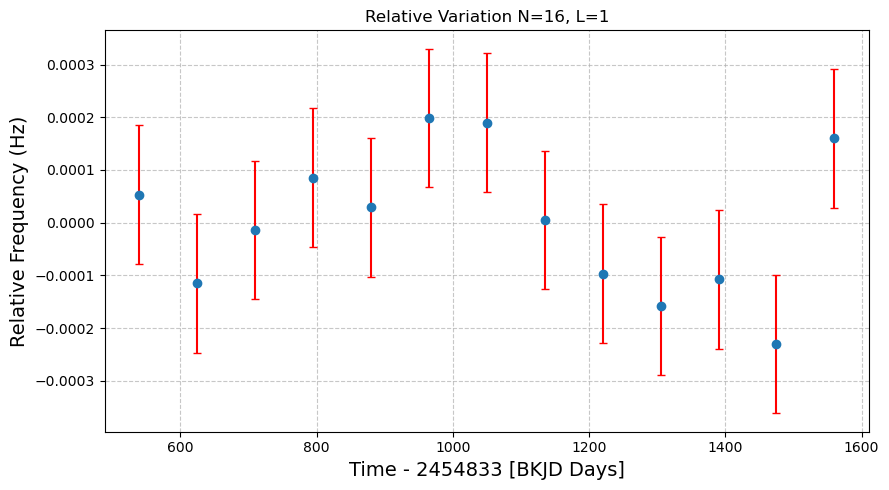

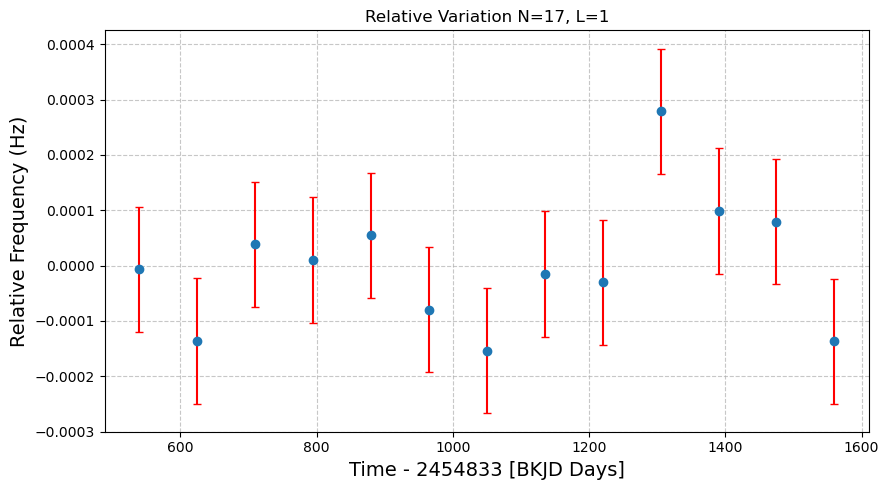

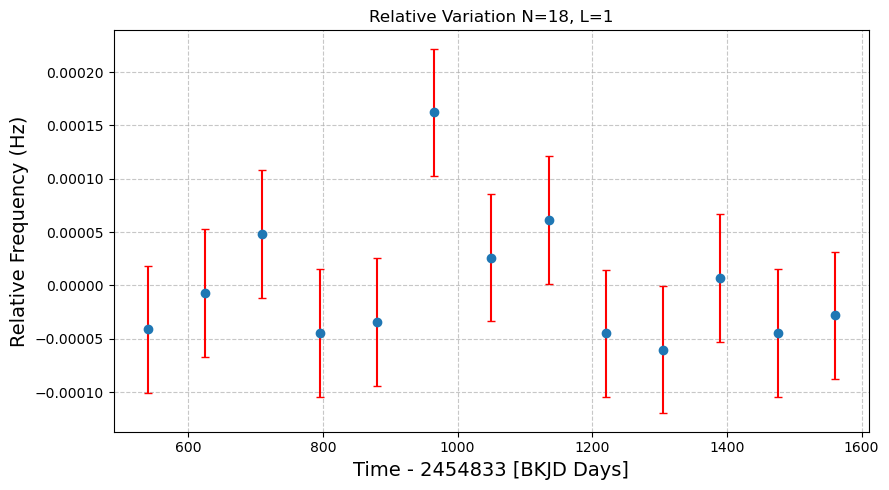

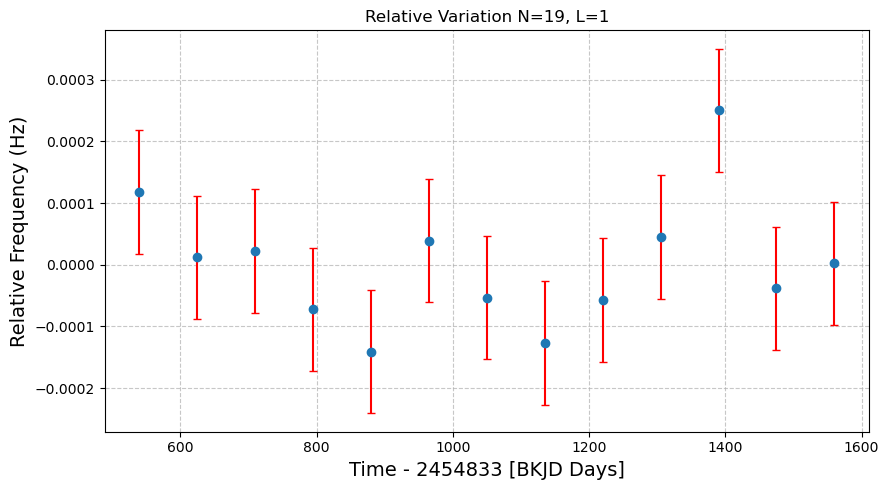

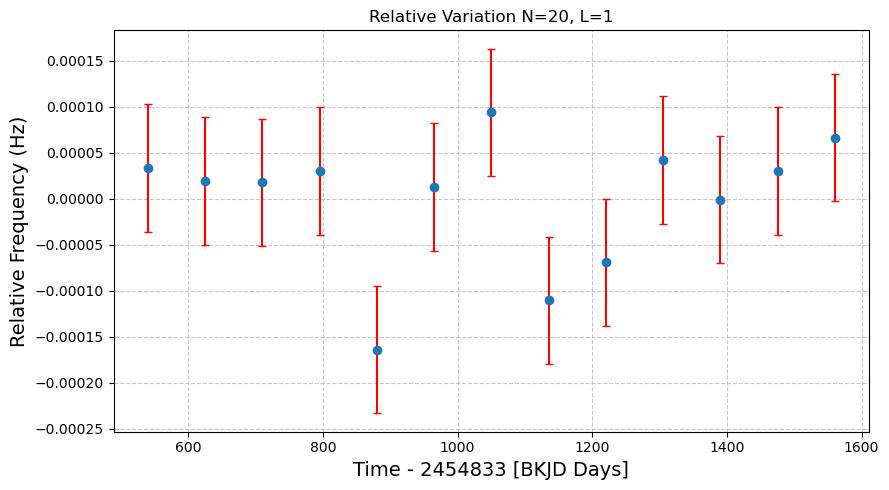

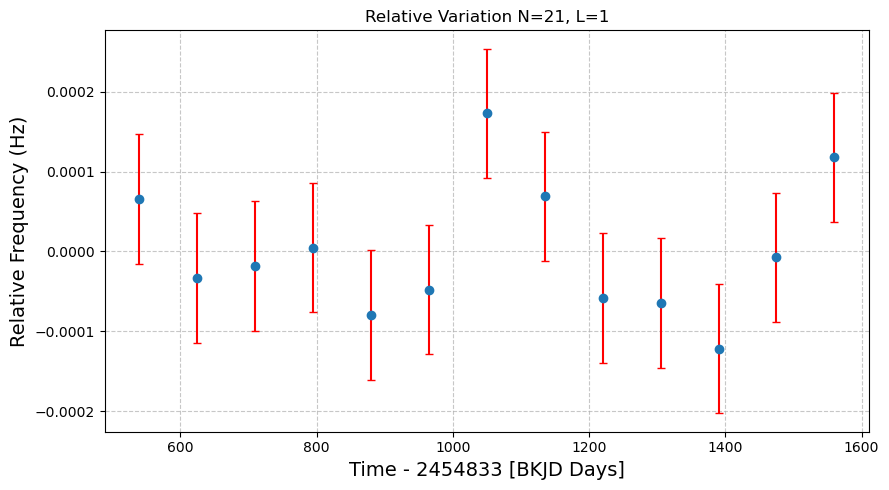

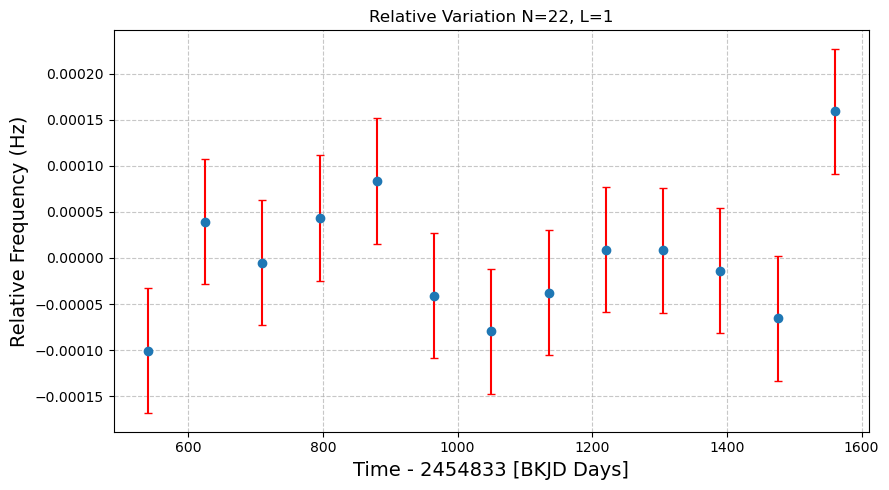

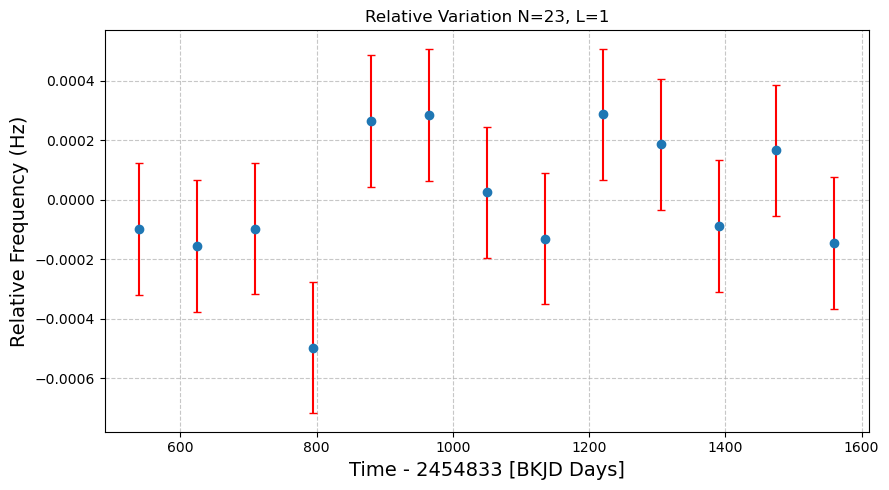

In [31]:
for i in range(len(relative_variations_l1)):
    fig, ax = plt.subplots(figsize=(9,5))
    plt.errorbar(timestamps, relative_variations_l1[i], yerr=np.array(std_values_l1)[i]/values_l1[i], fmt='o', ecolor='r', capsize=3)
    plt.title(f'Relative Variation N={i+16}, L=1')
    plt.xlabel('Observation Index', fontsize=14)
    plt.ylabel('Relative Frequency (Hz)', fontsize=14)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.xlabel('Time - 2454833 [BKJD Days]')
    #plt.savefig(f'/home/chrisl2324/KIC6106145/New_Fit/L0/Relative_Variations/{i}')

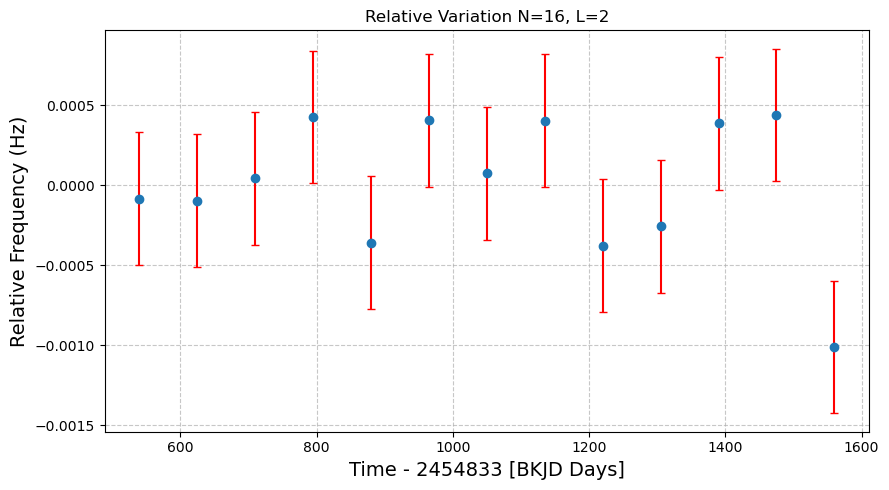

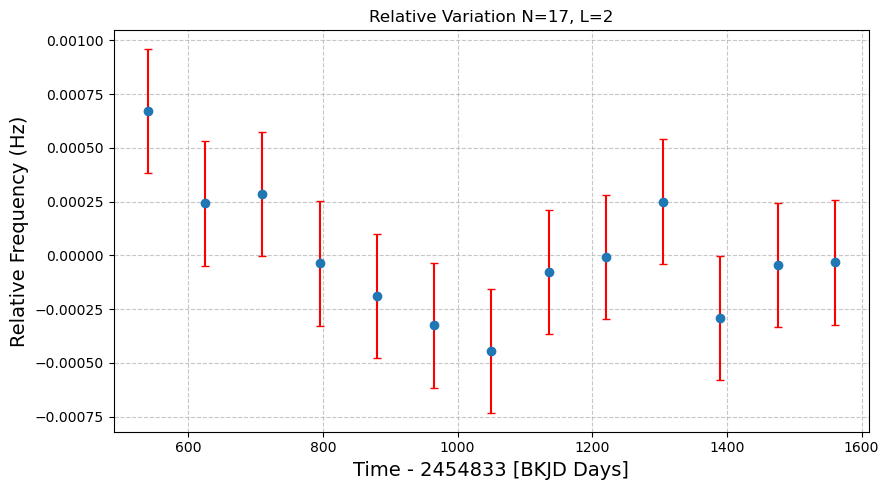

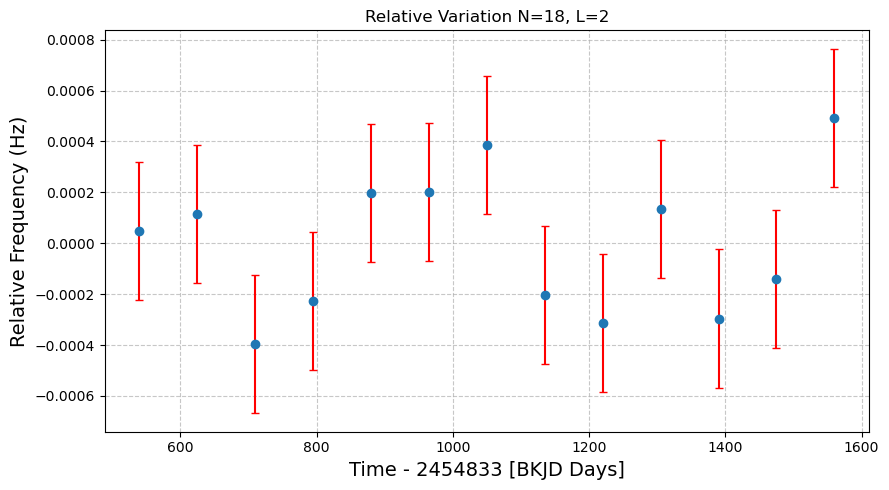

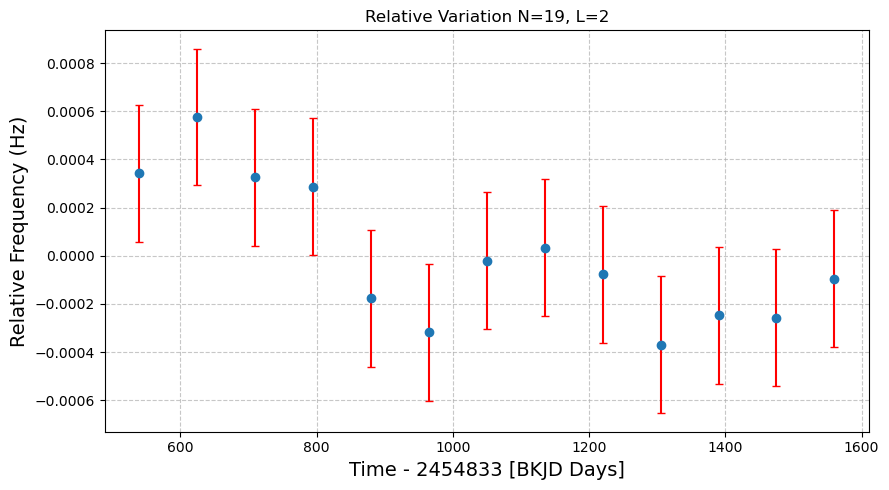

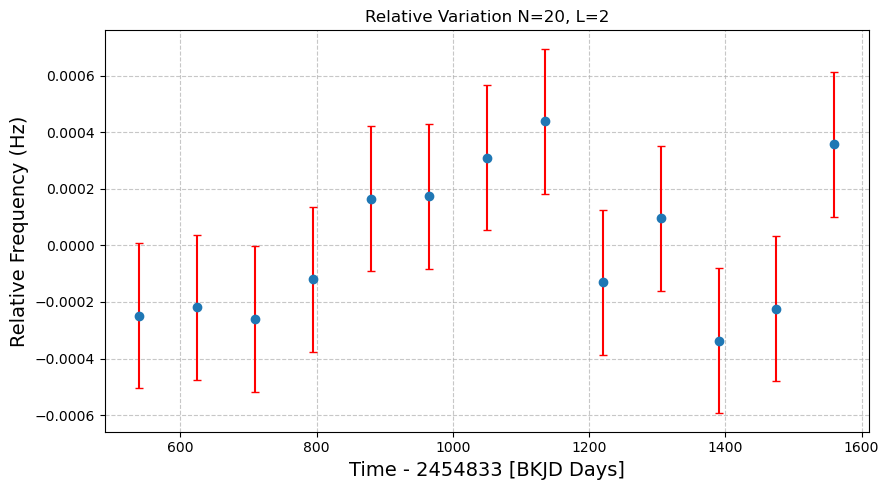

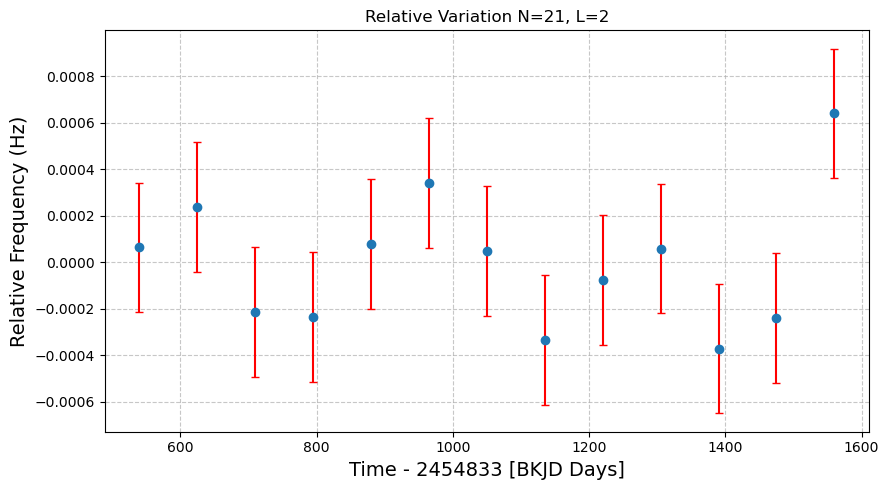

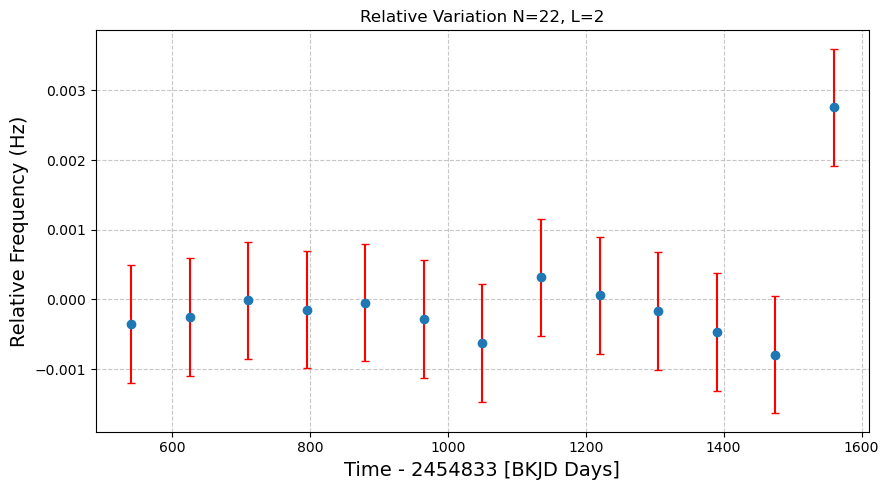

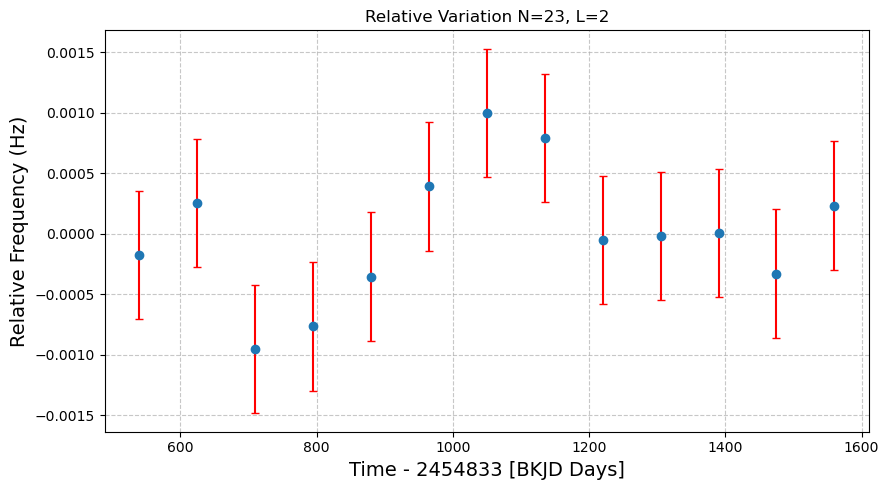

In [32]:
for i in range(len(relative_variations_l2)):
    fig, ax = plt.subplots(figsize=(9,5))
    plt.errorbar(timestamps, relative_variations_l2[i], yerr=np.array(std_values_l2)[i]/values_l2[i], fmt='o', ecolor='r', capsize=3)
    plt.title(f'Relative Variation N={i+16}, L=2')
    plt.xlabel('Observation Index', fontsize=14)
    plt.ylabel('Relative Frequency (Hz)', fontsize=14)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.xlabel('Time - 2454833 [BKJD Days]')
    #plt.savefig(f'/home/chrisl2324/KIC6106145/New_Fit/L0/Relative_Variations/{i}')w_Fit/L2/Relative_Variations/{i}')

In [33]:
frequencies = []
for df in dfs_pkb:
    frequency = np.sum(df['Nu'])
    length = len(df)
    frequencies.append((frequency/length)*1e-3)

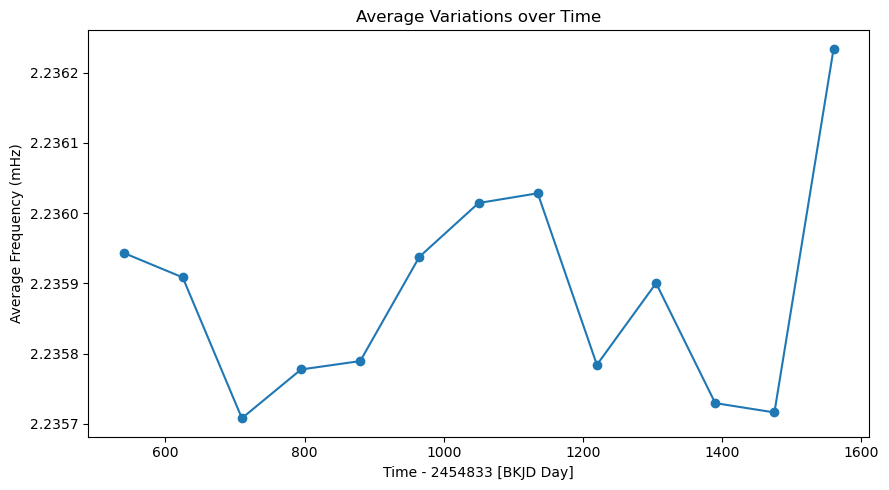

In [34]:
plt.figure(figsize=(9,5))
plt.plot(timestamps, frequencies, marker='o')
plt.title('Average Variations over Time')
plt.ylabel('Average Frequency (mHz)')
plt.xlabel('Time - 2454833 [BKJD Day]')
plt.tight_layout()
#plt.savefig('/home/chrisl2324/KIC6106145/New_Fit/Average_variations')

In [35]:
total_below = []
total_above = []

for df in dfs_pkb:
    # Filter frequencies below and above 3600
    avg_frequencies_below_2200 = df[df['Nu'] <= 2200]['Nu'].tolist()
    avg_frequencies_above_2200 = df[df['Nu'] > 2200]['Nu'].tolist()

    # Calculate averages, handling empty lists
    if avg_frequencies_below_2200:
        sum_below = np.mean(avg_frequencies_below_2200)
    else:
        sum_below = 0

    if avg_frequencies_above_2200:
        sum_above = np.mean(avg_frequencies_above_2200)
    else:
        sum_above = 0

    total_below.append(sum_below*1e-3)
    total_above.append(sum_above*1e-3)

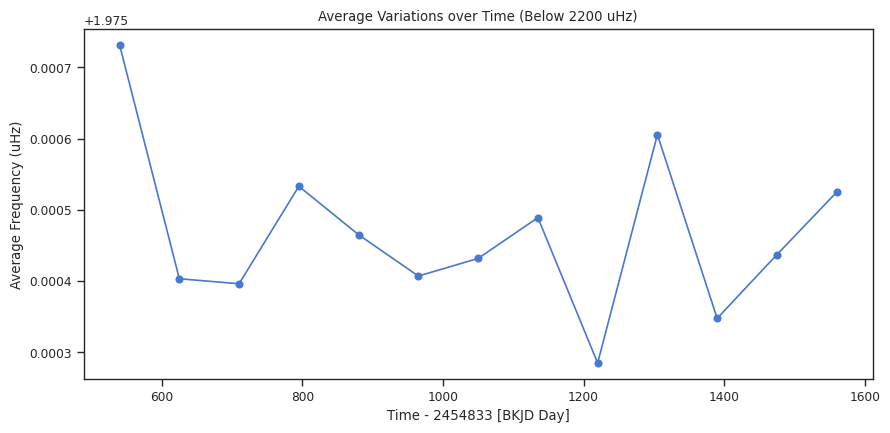

In [23]:
import seaborn as sns

sns.set_style("ticks")
blue, = sns.color_palette("muted", 1)
sns.set_context("paper")
plt.figure(figsize=(9,5))
plt.plot(timestamps, total_below, color=blue, marker='o')
plt.title('Average Variations over Time (Below 2200 uHz)')
plt.ylabel('Average Frequency (uHz)')
plt.xlabel('Time - 2454833 [BKJD Day]')
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(top=0.85)
plt.savefig('/home/chrisl2324/KIC6106145/New_Fit/Below2200')

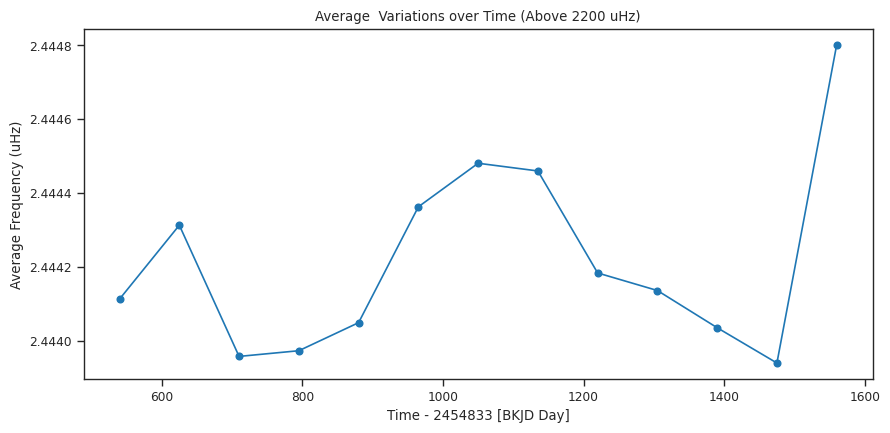

In [29]:
sns.set_style("ticks")
blue, = sns.color_palette("muted", 1)
sns.set_context("paper")
plt.figure(figsize=(9,5))
plt.plot(timestamps, total_above, marker='o')
plt.title('Average  Variations over Time (Above 2200 uHz)')
plt.ylabel('Average Frequency (uHz)')
plt.xlabel('Time - 2454833 [BKJD Day]')
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(top=0.85)
plt.savefig('/home/chrisl2324/KIC6106145/New_Fit/Above2200')

In [27]:
timestamps = np.linspace(540, 1560, 13)
timestamps

array([ 540.,  625.,  710.,  795.,  880.,  965., 1050., 1135., 1220.,
       1305., 1390., 1475., 1560.])